
## Applying Supervised Machine Learning to Surface Weather Observations #

In this tutorial, we will explore different approaches to supervized machine learning using surface weather observations. This notebook will utilize the pre-processing techniques from the previous module to train basic ML models and evaluate model performance. 

A brief introduction to ML models will be provided in lecture-like materials, with links to (hopefully) helpul resources. You will have the oppotuntiy to put into practice some the machine learning techniques demonstrated in this module at the end of the course  through a coding exercises.

Please cite the notebook as follows:

    McNicholas, C., 2021: "Appying Supervised Machine Learning to Surface Weather Observations"

The data for this tutorial can be cited as: 

    McGovern, A., Burke, A., Harrison, D., and G. M. Lackmann, 2020: A Machine Learning Tutorial for Operational Forecasting: Part I. Wea. Forecasting, In Press 

## Module Setup

Import relevant python libraries. 

*   Matplotlib (plotting)
*   Pandas (data analysis)
*   Numpy (array, matrix, and mathematical functions)
*   Xarray (analysis of multi-dimensional data)
*   sklearn (machine learning models)
*   XGBoost (fast gradient boosting model)
<br>

In [2]:
#Import relevant libraries and install netcdf4
import pandas as pd
import numpy as np
import gdown
#install netcdf4 (for xarray)
! pip install netcdf4
! pip install --upgrade scikit-learn
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from datetime import datetime
#Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from sklearn.feature_selection import SelectFromModel
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
#Machine learning models
from sklearn.linear_model import LinearRegression #linear models
from sklearn import svm #support vectorr machine
from sklearn import tree #decision trees
#Ensemble Decision Tree Algorithms
from sklearn.ensemble import RandomForestRegressor 
#These two are not covered in the course but feel free to try them in the exercise!
#explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor 
#Instal Extreme gradient boosting
!pip install xgboost
import xgboost as xgb
#ML Aggregation (Average methods)
from sklearn.ensemble import VotingRegressor
#ML Stacking (Combine Estimators sequentially)
from sklearn.ensemble import StackingRegressor
#Add multiple output support for Supervised ML
from sklearn.multioutput import MultiOutputRegressor
#Simple Neurel Net (For comparison with ensemble techniques)
from sklearn.neural_network import MLPRegressor
#Model evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')



### Prevent Auto-scrolling

The next cell prevents output in the notebook from being nested in a scroll box

In [3]:
#For jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#For google colab
#%%javascript
#IPython.OutputArea.prototype._should_scroll = function(lines) {
#    return false;

## Import data

The next cell imports all of the data that will be used by this notebook. 
Uncoment and run the cell below if you haven't cloned the GitHub repository and do not already have the AI_tutorial_data/ folder in your local directory.

In [ ]:
#Download AI tutorial file from google drive

#Original method
#MLurl = 'https://drive.google.com/u/0/uc?export=download&confirm=SH5G&id=1r7osoXZQPmFhvO5-IYTEevDB_lmUbc7Q' 
#MLoutput = 'AI_tutorial_data.zip'
#gdown.download(MLurl, MLoutput, quiet=False)

#Extract tutorial data from gzipped file
#! unzip AI_tutorial_data.zip
#! rm *.tar.gz 
#!ls

'''
Location list

#kbro - brownsville, TX
#kcys - Cheyenne, WY
#koma - Omaha, NE
#kdbq - Dubuque, IA
#kcmh - Columbus, OH
#kchs - Charleston, SC
#klit - Little Rock, AK
#kboi - Boise, ID
#klch - Lake Charles, LA
#kgeg - Spokane, WA
#kdfw - Dallas-Ft Worth, TX
#kroa - Roanoke-Blacksburg, VA
#keug - Eugene, OR
#kast - Astoria, OR
#kdlh - Duluth, MN
#kjax - Jacksonville, FL
'''

<br>


# Tutorial Overview


<br>

**Brief:** 
1. What is ML/Artificial Intelligence (AI) 
2. General ML Pipeline
3. Prediction Problem and Dataset Information
4. Data Visualization

**More in Depth:**
5. Data Pre-processing
  - Partitioning Data
  - Transforming and Scaling Data

6. Machine Learning Models
  - Scoring 
  - Linear Methods
  - Tree-based 
  - Ensemble and Aggregate Methods

7. Model evaluation
  - Feature Analysis
  - Accuracy and Reliability

8. Multi-output Regression

9. Classification

10. Excercises

[Here](https://towardsdatascience.com/list-of-free-must-read-machine-learning-books-89576749d2ff) is a list of free books about ML from a statistical perspective.
 


<br>


# **1. What is ML/AI**



<br>

### Differences between Traditional Programming and ML

<img src="https://images.contentful.com/pqts2v0qq7kz/4Mcjw0xAi4auqweOQQyWCu/80236c975b5026ec67e61f767a646b45/machine_learning_flow--4j88rajonr_s600x0_q80_noupscale.png" width="400">


### Differences between AI and ML

- ML, a subset of AI, is designed to improve prediction performance given new data 
- Deep Learning (DL), a subset of ML, uses neural networks and numerous non-linear layers to create predictive models

More information: 
[AI versus ML versus DL](https://towardsdatascience.com/clearing-the-confusion-ai-vs-machine-learning-vs-deep-learning-differences-fce69b21d5eb/)

<img src="https://miro.medium.com/max/663/0*R53mzDRJXZ8l6idL" width="500">



<br>


# **2. General ML pipeline**




You can simply throw data at a ML model and expect something to stick, right? 

NO! *(Well maybe but you shouldn't!)*

<img src="https://imgs.xkcd.com/comics/machine_learning.png" width="350">


### The (brief) end-to-end process for using ML models

*Define the Problem*
  - Look at the data and forecasting task to see if ML is appropriate. Do existing methods produce skillful results? If so then ML may not be necessary.
  - Is the data normally distributed, correlated, etc.? **Do you have enough data if what you are trying to predict is rare?**

*Separate Data* 
  - Split your data into **at least two independent sets**: training and testing
  - Possibly use validation set to tune ML models before applying them to the testing set. 

*Data Pre-processing* 
  - After determining ML would benefit your problem domain, transform the data to be more amenable for ML
  - Find out what shape the data needs to be (vectors for ML versus tensors for DL)
  - Normalize/Scale data
  
### ***The above steps are at least 80% of the work when working with ML models***


*Model Training*
  - Optimize ML model(s) using the **training dataset only**

*Model Deployment*
  - Apply the trained ML model to the **testing dataset only** 

*Model Evaluation*
  - Use verification metrics and subjective evaluations to determine the skill of the ML model for a given predictive task.  

*Model Interpretation*
  - Use different interpretation techniques (variable importance, learning curves, etc.) to determine **why** the ML model(s) make decisions and whether the model(s) can be improved.
  - Evaluate if the decision-making process is reasonable
  - Allow end-users to better trust the ML decisions

<br>

## These steps are applicable for both ML and DL models. More details about the ML pipeline can be found [here](https://www.oreilly.com/library/view/building-machine-learning/9781492053187/ch01.html). 

<br>

<br>


# **3. Prediction Problem and Dataset Information**



<br>




<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/NWS_Weather_Forecast_Offices.svg/720px-NWS_Weather_Forecast_Offices.svg.png" width="600">


We are going to mimic the [WxChallenge](https://www.wxchallenge.com/) (with slight changes for time constraints)
  - Use regression to predict the high/low temperature of a given city
  - Use classification to predict whether precipitation will occur at a given city.
  - Relatively straight forward problem that is familiar to many meteorologists 
  - Learn the ML process on one city and apply you knowledge to an entirely different prediction problem or to another city, it is up to you! (See section 10) 


 **Dataset Information**
- Numerical Weather Prediction (NWP) point forecasts from the Iowa Environmental Mesonet between 1 January 2011 to 1 August 2019
- 24-hour forecast runs from the GFS, NAM, RAP, and NAM 4km at 0000, 0600, 1200, and 1800 UTC
- 70 hourly forecast variables for each model 
- NWP variables processed into 24-hour maximum, minimum, and average values for the 0600 to 0600 UTC period (same as WxChallenge)
- If one NWP forecast is missing, replaced with average value from all other NWP forecasts for the given variable
- Observations are NWS ASOS point data for a given city  
- Days with missing observations were removed




<br> 


Load in the CSV data. *We will look at [KROA](https://en.wikipedia.org/wiki/Roanoke%E2%80%93Blacksburg_Regional_Airport) (Roanoke-Blacksburg Regional Airport)*

<br>

In [32]:
#Read in data for KROA (Roanoke, VA) using pandas
total_dataset = pd.read_csv('AI_tutorial_data/kroa_processed_data.csv',index_col=0).sort_values(by='date')
#Eliminate gaps in data 
total_dataset = total_dataset.replace('********', np.nan).replace(np.inf,np.nan).dropna(how='any',axis=1)
#Remove bad observations
total_dataset = total_dataset[total_dataset['OBS_tmpf_max']!=total_dataset['OBS_tmpf_min']]
total_dataset = total_dataset.drop(index=557) #Bad index (day when METAR reported erroneous min temperature)
total_dataset = total_dataset.reset_index()

Use pandas to visualize the data in tabular format

In [33]:
#Display the first three rows of the dataframe
total_dataset.head(n=3)

,index,date,OBS_tmpf_max,OBS_tmpf_min,OBS_sknt_max,OBS_phour,GFS0_pmsl_max,GFS0_pmsl_min,GFS0_pmsl_avg,GFS0_pres_max,...,NAMMOS12_cig_avg,NAMMOS12_vis_max,NAMMOS12_vis_min,NAMMOS12_vis_avg,NAMMOS12_poz_max,NAMMOS12_poz_min,NAMMOS12_poz_avg,NAMMOS12_pos_max,NAMMOS12_pos_min,NAMMOS12_pos_avg
0,0,2011-01-01,53.96,35.06,11.0,0.07,1021.7,1016.4,1018.300000,979.2,...,3.250000,7.0,3.0,5.000000,5.666667,2.0,4.069444,5.00,0.0,0.791667
1,1,2011-01-02,53.60,30.02,22.0,0.00,1024.4,1015.9,1019.577778,980.4,...,5.571429,7.0,5.0,6.714286,9.500000,2.0,5.290476,39.75,0.0,11.648214
2,2,2011-01-03,41.00,24.08,9.0,0.00,1027.7,1022.0,1024.679167,983.6,...,8.000000,7.0,7.0,7.000000,2.000000,2.0,2.000000,93.25,92.5,92.875000


In [34]:
#Display the last three rows of the dataframe
total_dataset.tail(n=3)

,index,date,OBS_tmpf_max,OBS_tmpf_min,OBS_sknt_max,OBS_phour,GFS0_pmsl_max,GFS0_pmsl_min,GFS0_pmsl_avg,GFS0_pres_max,...,NAMMOS12_cig_avg,NAMMOS12_vis_max,NAMMOS12_vis_min,NAMMOS12_vis_avg,NAMMOS12_poz_max,NAMMOS12_poz_min,NAMMOS12_poz_avg,NAMMOS12_pos_max,NAMMOS12_pos_min,NAMMOS12_pos_avg
3133,3134,2019-07-30,91.0,69.1,17.0,0.2200,1017.3,1013.9,1015.879167,976.5,...,8.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3134,3135,2019-07-31,87.1,68.0,11.0,0.0000,1018.1,1014.3,1016.579167,977.1,...,8.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3135,3136,2019-08-01,88.0,66.2,12.0,0.7602,1019.0,1014.6,1017.283333,978.0,...,8.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0


Note the large number of predictors (i.e. features) in the dataset. With thousands of features to choose from automated methods may be more practical for winnowing which features are useful for weather prediction.

In [35]:
#Show variables in dataframe
print('The columns (predictor/input variables) we have to work with are:\n')
print(total_dataset.columns)
#Explore the different variables if you wish

The columns (predictor/input variables) we have to work with are:

Index(['index', 'date', 'OBS_tmpf_max', 'OBS_tmpf_min', 'OBS_sknt_max',
       'OBS_phour', 'GFS0_pmsl_max', 'GFS0_pmsl_min', 'GFS0_pmsl_avg',
       'GFS0_pres_max',
       ...
       'NAMMOS12_cig_avg', 'NAMMOS12_vis_max', 'NAMMOS12_vis_min',
       'NAMMOS12_vis_avg', 'NAMMOS12_poz_max', 'NAMMOS12_poz_min',
       'NAMMOS12_poz_avg', 'NAMMOS12_pos_max', 'NAMMOS12_pos_min',
       'NAMMOS12_pos_avg'],
      dtype='object', length=2694)


<br>

# **4. Data Visualization**

<br> 

In this notebook we will examine four variables:

**Daily**
- minimum temperature
- maximum temperature
- maximum wind speed
- precipitation (boolean)

The code below filters out these variables from the feature dataset

In [36]:
#Filter variables by name
min_temperature_mdl = total_dataset.filter(like='tf_min')
#Display minimum temperature variables
print(min_temperature_mdl.columns)

max_temperature_mdl = total_dataset.filter(like='tf_max')
#Display maximum temperature variables
print(max_temperature_mdl.columns)

max_wspd_mdl = total_dataset.filter(like='wspd_max')
#Display maximum wind speed variables
print(max_wspd_mdl.columns)

precip_mdl = total_dataset.filter(like='qpf_avg')
#Display average precipitation variables
print(precip_mdl.columns)

# --------------------------------------------------- #

#Date format
fmt = '%Y-%m-%d'
#Retrieve time series dates
dates = total_dataset['date'].values
#Convert to datetime object
dts = np.array([datetime.strptime(d,fmt) for d in dates])

#Retrieve observation time series 
max_temperature_obs = total_dataset['OBS_tmpf_max'].values
min_temperature_obs = total_dataset['OBS_tmpf_min'].values
wspd_obs = total_dataset['OBS_sknt_max'].values
phour_obs = total_dataset['OBS_phour'].values
#Convert precipitation variable into boolean (precip: 1 = yes; 0 = no)
phour_obs[phour_obs>0.0] = 1
total_dataset['OBS_phour'] = phour_obs

Index(['GFS0_tf_min', 'GFS6_tf_min', 'GFS12_tf_min', 'GFS18_tf_min',
       'NAM0_tf_min', 'NAM6_tf_min', 'NAM12_tf_min', 'NAM18_tf_min',
       'NAM4km0_tf_min', 'NAM4km6_tf_min', 'NAM4km12_tf_min',
       'NAM4km18_tf_min'],
      dtype='object')
Index(['GFS0_tf_max', 'GFS6_tf_max', 'GFS12_tf_max', 'GFS18_tf_max',
       'NAM0_tf_max', 'NAM6_tf_max', 'NAM12_tf_max', 'NAM18_tf_max',
       'NAM4km0_tf_max', 'NAM4km6_tf_max', 'NAM4km12_tf_max',
       'NAM4km18_tf_max'],
      dtype='object')
Index(['GFS0_wspd_max', 'GFS6_wspd_max', 'GFS12_wspd_max', 'GFS18_wspd_max',
       'NAM0_wspd_max', 'NAM6_wspd_max', 'NAM12_wspd_max', 'NAM18_wspd_max',
       'NAM4km0_wspd_max', 'NAM4km6_wspd_max', 'NAM4km12_wspd_max',
       'NAM4km18_wspd_max'],
      dtype='object')
Index(['GFS0_qpf_avg', 'GFS6_qpf_avg', 'GFS12_qpf_avg', 'GFS18_qpf_avg',
       'NAM0_qpf_avg', 'NAM6_qpf_avg', 'NAM12_qpf_avg', 'NAM18_qpf_avg',
       'NAM4km0_qpf_avg', 'NAM4km6_qpf_avg', 'NAM4km12_qpf_avg',
       'NAM4km18_q

### Observations

Visualize distribution of observations for the four aformentioned variables. Note that precipitation is not uncommon at KROA. 

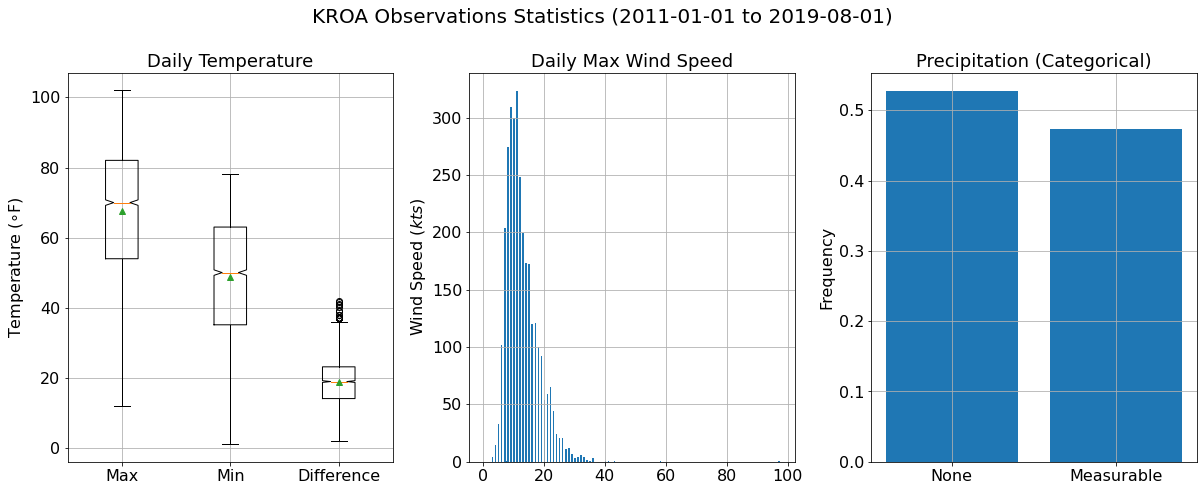

In [37]:
#Set minimum font size for plot
fs=16
matplotlib.rcParams.update({'font.size': fs})

#Initialize figure
fig = plt.figure(figsize=(17,7))
#Plot distribution of observed daily high/low temperature and temperature range
ax1 = plt.subplot(131)
plt.boxplot([max_temperature_obs,min_temperature_obs,max_temperature_obs-min_temperature_obs],notch=True,showmeans=True,showfliers=True)
plt.grid(True)
#Add axis labels and title
plt.ylabel('Temperature ($\circ$F)')
ax1.set_xticklabels(['Max','Min','Difference'])
plt.title('Daily Temperature',fontsize=fs+2)
#Plot histogram of daily maximum wind speed
ax2 = plt.subplot(132)
bins = np.arange(0, round(wspd_obs.max(),0) + 1, 0.5)
bins = bins[1:]
plt.hist(wspd_obs,bins=bins)
plt.grid(True)
#Add axis labels and title
plt.ylabel('Wind Speed ($kts$)')
plt.title('Daily Max Wind Speed',fontsize=fs+2)
#Plot frequency of precipitation in bar chart.
ax3 = plt.subplot(133)
#Get number of days when there was no precipitation and number of days when there was precipitation
yl = np.float32([len(phour_obs[phour_obs==0]),len(phour_obs[phour_obs==1])])
#Convert to fraction
yl = yl/yl.sum() 
#Define labels for bar chart
xl = ['None', 'Measurable']
ax3.bar(xl,yl) #plot bars
#Add axis labels and title
plt.ylabel('Frequency')
plt.title('Precipitation (Categorical)',fontsize=fs+2)
plt.grid(True)
#Tighten plot layout (adding padding along width dimension of 1)
plt.tight_layout(w_pad=1)
#Make room at top of subplots for sup title
plt.subplots_adjust(top=0.85)
#Add suptitle and show plot
plt.suptitle('KROA Observations Statistics ('+dates[0]+' to '+dates[-1]+')',fontsize=fs+4)
plt.show()

### Baseline Model

At a minimum machine learning models should outperform NWP in forecasting the observed daily high/low temperature, max wind, and precipitation. 

Lets evaluate the accuracy of NWP by computing the error of the NWP model average for each target variable.

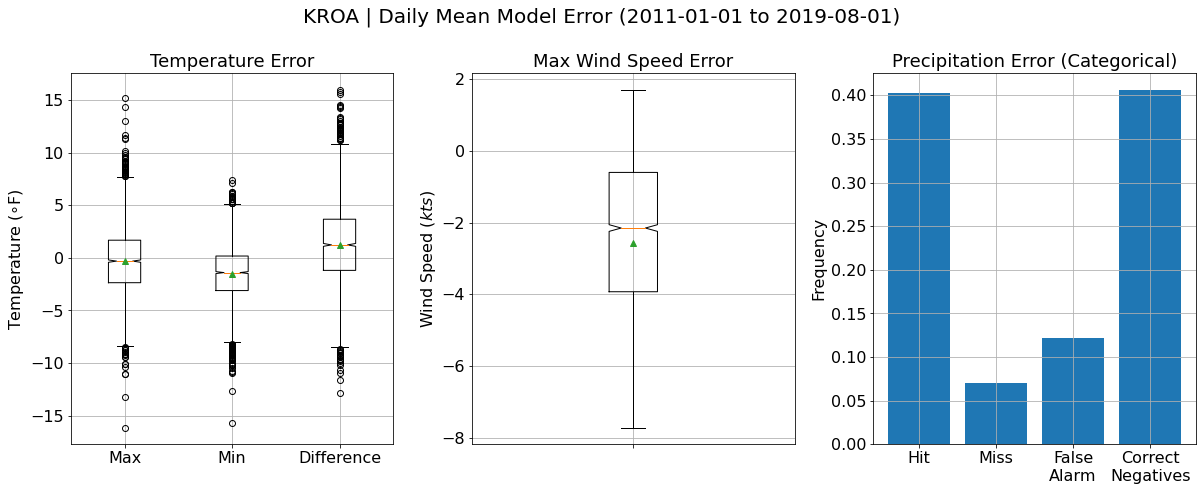

In [38]:
#Set minimum font size for plot
fs=16
matplotlib.rcParams.update({'font.size': fs})

#Get daily max temperature forecast from NWP 
max_tmp = max_temperature_mdl.mean(axis=1)
#Get daily min temperature forecast from NWP
min_tmp = min_temperature_mdl.mean(axis=1)
#Get difference between daily max/min temperature
tmp_diff = max_tmp-min_tmp

#Get mean maximum wind speed from models
max_wnd = max_wspd_mdl.mean(axis=1)

#Retrieve precipitation variables 
precip_mdl = total_dataset.filter(like='qpf_avg')

#For each feature, convert QPF to categorical variable (1 = precip, 0 = no precip)
for p in precip_mdl.columns:
  prp = precip_mdl[p].values
  prp[prp>0]=1 #Assign for any measureable precip
  precip_mdl[p] = prp #Replace variables in array

#Compute mean of categorical variables
precip_mn = precip_mdl.mean(axis=1)
#If majority of features suggest rain than assign precip boolean to equal 1
precip_mn[precip_mn>=0.5] = 1
precip_mn[precip_mn<0.5] = 0

cnts = [0,0,0,0] #Four index array (hit, miss, false alarm, correct negative)
for p in range(0,len(phour_obs)):
  mdl_avg = precip_mn[p]
  pobs = phour_obs[p]

  #Hit
  if ((pobs == 1) and (mdl_avg == 1)):
    cnts[0]+=1

  #Miss
  if ((pobs == 1) and (mdl_avg == 0)):
    cnts[1]+=1

  #False Alarm
  if ((pobs == 0) and (mdl_avg == 1)):
    cnts[2]+=1

  #Correct Negative
  if ((pobs == 0) and (mdl_avg == 0)):
    cnts[3]+=1

cnts = np.float32(cnts)

#Plot NWP model mean errors statistic for min/max temperature, max wind speed, and precipitation
fig = plt.figure(figsize=(17,7))

#Plot min/max temperature error
ax1 = plt.subplot(131)
#Boxplots of daily temperature error (min/max)
plt.boxplot([max_tmp-max_temperature_obs,(min_tmp-min_temperature_obs),(tmp_diff-(max_temperature_obs-min_temperature_obs))],notch=True,showmeans=True) #,whis=[5,95],showfliers=False)
plt.grid(True)
#Add axis and ticklabels
plt.ylabel('Temperature ($\circ$F)')
ax1.set_xticklabels(['Max','Min','Difference'])
plt.title('Temperature Error',fontsize=fs+2)

#Plot wind error
ax2 = plt.subplot(132)
plt.grid(True)
#Compute NWP wind speed error and plot
wspd_err = max_wnd-wspd_obs
plt.boxplot(wspd_err,notch=True,showmeans=True,whis=[5,95],showfliers=False)
#Add axis and ticklabels
plt.ylabel('Wind Speed ($kts$)')
plt.title('Max Wind Speed Error',fontsize=fs+2)
ax2.set_xticklabels([''])

#Plot categorical precipitation error
ax3 = plt.subplot(133)
#Define bar labels
xl = ['Hit', 'Miss','False\nAlarm','Correct\nNegatives']
#Plot bars
ax3.bar(xl,cnts/cnts.sum())
plt.ylabel('Frequency')
plt.title('Precipitation Error (Categorical)',fontsize=fs+2)

#adjust subplots and add title
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.grid(True)
plt.suptitle('KROA | Daily Mean Model Error ('+dates[0]+' to '+dates[-1]+')',fontsize=fs+4)
plt.show()

# **5. Data Pre-processing**

## Partitioning Data

What would happen if we use all of our data to build a model and evaluate its accuracy?

***Let's try!*** (Do not need to know how to do this yet)

In [39]:
#Observation data
total_label_data = total_dataset.filter(like='OBS')
print(total_label_data)

      OBS_tmpf_max  OBS_tmpf_min  OBS_sknt_max  OBS_phour
0            53.96         35.06          11.0        1.0
1            53.60         30.02          22.0        0.0
2            41.00         24.08           9.0        0.0
3            48.02         24.08          17.0        0.0
4            42.98         30.92          17.0        0.0
...            ...           ...           ...        ...
3131         89.10         64.90           8.0        0.0
3132         90.00         68.00          10.0        0.0
3133         91.00         69.10          17.0        1.0
3134         87.10         68.00          11.0        0.0
3135         88.00         66.20          12.0        1.0

[3136 rows x 4 columns]


In [40]:
#Variables used for training 
dropCols = list(total_label_data.columns) + ['date']
total_feature_data = total_dataset.copy(deep=True)
total_feature_data = total_feature_data.drop(dropCols,axis=1)
print(total_feature_data)

      index  GFS0_pmsl_max  GFS0_pmsl_min  GFS0_pmsl_avg  GFS0_pres_max  \
0         0         1021.7         1016.4    1018.300000          979.2   
1         1         1024.4         1015.9    1019.577778          980.4   
2         2         1027.7         1022.0    1024.679167          983.6   
3         3         1021.7         1013.5    1017.275000          977.9   
4         4         1018.3         1009.4    1014.866667          974.2   
...     ...            ...            ...            ...            ...   
3131   3132         1022.8         1017.3    1020.350000          981.6   
3132   3133         1019.4         1013.9    1016.791667          978.4   
3133   3134         1017.3         1013.9    1015.879167          976.5   
3134   3135         1018.1         1014.3    1016.579167          977.1   
3135   3136         1019.0         1014.6    1017.283333          978.0   

      GFS0_pres_min  GFS0_pres_avg  GFS0_sktc_max  GFS0_sktc_min  \
0             974.2     975.980

### How much data should go in each subset?
  - Depends (I know, not the most ideal answer)
  - Typical train/test split is 80% for training and 20% for testing
    - Varies for the size of your dataset

### **Lets split the data officially into training and testing datasets** 
  - Eliminate features with zero variance. (i.e. [variance thresholding](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold))

In [41]:
# Function to split data based on given dates
def split_data_year(input_data,labels,start_date_str,end_date_str):
  data = input_data.copy()
  date_list = pd.to_datetime(data['date'])
  date_mask = (date_list >= start_date_str) & (date_list <= end_date_str)
  out_data = data.loc[date_mask,:].drop(['date'],axis=1)
  out_labels = labels.loc[date_mask,:]
  return out_data,out_labels

def drop_duplicates(dfv):
  #Remove columns filled with dupliate values
  nunique = dfv.apply(pd.Series.nunique)
  cols_to_drop = nunique[nunique == 1].index
  dfv = dfv.drop(cols_to_drop, axis=1)
  return dfv

def drop_novar(Xs_train,Xs_test,ys_train):
    
  #Remove features whose variance is extremely low (e.g. columns with all zeros)
  vt_sel = VarianceThreshold(threshold=0).fit(Xs_train)
  Xs_train_vsel_arr = vt_sel.transform(Xs_train)
  Xs_test_vsel_arr = vt_sel.transform(Xs_test)

  #Get mask of features selected
  fselect = vt_sel.get_support()
  #Retrieve and print column names of selected features
  fidx = np.argwhere(fselect==1).T[0]
  good_features = Xs_train.columns[fidx]

  #Convert to pandas dataframe
  Xs_train_vsel = pd.DataFrame(Xs_train_vsel_arr, columns = good_features)
  Xs_test_vsel = pd.DataFrame(Xs_test_vsel_arr, columns = good_features)

  return Xs_train_vsel,Xs_test_vsel

In [42]:
# Remove MOS data based on previous work 
mosCols = [key for key in total_dataset.columns if 'MOS' in key]
total_dataset = total_dataset.drop(mosCols, axis = 1)
total_dataset = drop_duplicates(total_dataset)

#Get total data
total_label_data = total_dataset.filter(like='OBS')
dropCols = list(total_label_data.columns)
total_feature_data = total_dataset.copy(deep=True).drop(dropCols,axis=1)
#vv = total_feature_data.var(axis=0)

#Training data between 2011 and 2017
X_train, y_train = split_data_year(total_feature_data,
    total_label_data,'2011-01-01','2017-12-31')

#Testing data between 2018 and 2019
X_test, y_test = split_data_year(total_feature_data,
    total_label_data,'2018-01-01','2019-12-31')

X_train,X_test = drop_novar(X_train,X_test,y_train)

## Scaling and Transforming Data

 
Why should you scale your data?
- Some ML models are not scale invariant (e.g. [SVMs](https://scikit-learn.org/stable/modules/svm.html#regression) and [MLPs](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron)). For these models, data variables with different scales (e.g. temperature versus sea-level pressure) affects what variables are considered important 
- Temperatures varying from $\sim$180-330 K will be prioritized over specific humidity values varying from $\sim$0-0.02 kg kg$^{-1}$

Normalizing or scaling data removes this issue.

**Important: We normalize/scale our data based on the training data and save these values to apply to testing data**

More details about each transformation method can be found [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

**[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)**

Scalar = $\frac{x_{i} - min(x)}{max(x) - min(x)}$

Scales data between 0 and 1 based on training data minimum and maximum values

**Method of scaling for this notebook**

- Replace any outlier values ( > 3 standard deviations from mean) with the training data mean

- Use MinMaxScaler after replacement

- Reduces the chance outliers affect training scaling values

In [43]:
def remove_outliers(train_features,test_features):
  #Make copy of features prior to normalization and scaling
  no_outlier_train_features = train_features.copy()
  no_outlier_test_features = test_features.copy()

  #Retrieve the mean and standard deviation of features during training
  train_standard_dev = train_features.std()
  train_mean = train_features.mean()

  #Remove outliers from the training and testing datasets
  for column in train_features.columns:
    outlier_threshold_value = 3.0*train_standard_dev[column]
    
    #pandas.where() documentation:
    #Where cond is True, keep the original value. Where False, replace with corresponding value from other
    no_outlier_train_features[column].where(
        np.abs(train_features[column]-train_mean[column]) < outlier_threshold_value, 
        train_mean[column],
        inplace=True)

    no_outlier_test_features[column].where(
        np.abs(test_features[column]-train_mean[column]) < outlier_threshold_value, 
        train_mean[column],
        inplace=True)
    
    return no_outlier_train_features,no_outlier_test_features

def scale_data(train_features,test_features):
  #Initialize MinMax scaler to with training dataset
  minmax_scaler = MinMaxScaler().fit(train_features)
  #Scale datasets using MinMax scaling derived solely from the training dataset
  train_features_scaled = minmax_scaler.transform(train_features)
  test_features_scaled = minmax_scaler.transform(test_features)
  #Return scaled features as pandas dataframes
  train_features_scaled = pd.DataFrame(train_features_scaled,columns=train_features.columns)
  test_features_scaled = pd.DataFrame(test_features_scaled,columns=test_features.columns)
  return train_features_scaled,test_features_scaled

#Remove outliers from full dataset
X_train_nout,X_test_nout = remove_outliers(X_train,X_test)
#Scale data from full dataset
X_train_scaled,X_test_scaled = scale_data(X_train_nout,X_test_nout)

## Dimensionality Reduction

Feature selection is about pairing down the number of features used in training to only those which help constrain model predictions.

If your background is in atmospheric science you could probably do this feature selection subjectively using prior knowledge. However, with over 2000 features in the dataset its much more efficient to utilize pre-existing approaches to feature selection that can help automate the process.

**Why perform dimensionality reduction?**
- Requires less space to store data
- Model training is faster on smaller dimensional datasets
- Only train on relevant features (reduces redundancy)
- Easier to visualize in lower dimensional space

**[Univariate Feature Selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)**

Another approach to feature selection is to selet features based on univariate statistical tests. 

In [44]:
def get_usel(Xs_train,Xs_test,yval,cnt):
  #Select the highest 50 scoring features. Important! Only fit on the training dataset.
  ut_sel = SelectKBest(f_regression,k=cnt).fit(Xs_train,yval)
  #Transform both training and test datasets
  Xs_train_usel_arr = ut_sel.transform(Xs_train)
  Xs_test_usel_arr = ut_sel.transform(Xs_test)

  #Get mask of features selected
  fselect = ut_sel.get_support()
  #Retrieve and print column names of selected features
  fidx = np.argwhere(fselect==1).T[0]
  good_features = Xs_train.columns[fidx]

  #Convert to pandas dataframe
  Xs_train_usel = pd.DataFrame(Xs_train_usel_arr, columns = good_features)
  Xs_test_usel = pd.DataFrame(Xs_test_usel_arr, columns = good_features)

  #Show data dimensions before and after feature selection
  print(f'\nTraining Data shape: {Xs_train.shape}')
  print(f'Selected Training Data shape: {Xs_train_usel.shape}')
  return Xs_train_usel,Xs_test_usel

**[Model-based Feature Selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)**

Model-based estimators can be used to winnow features based on relative importance

In [45]:
def get_msel(mdl,Xs_train,Xs_test,yval,thresh):
  mdl.fit(Xs_train,yval)
  #Use select from model to discard irrelevant features
  model = SelectFromModel(mdl, threshold=thresh, prefit=True)
  #Transform both training and testing datasets
  Xs_train_tsel_arr = model.transform(Xs_train)
  Xs_test_tsel_arr = model.transform(Xs_test)
  #Retrieve indices of selected columns
  msel = model.get_support()
  #Get names of select features
  good_features = Xs_train.columns[msel]
  #Convert to pandas dataframe
  Xs_train_tsel = pd.DataFrame(Xs_train_tsel_arr, columns = good_features)
  Xs_test_tsel = pd.DataFrame(Xs_test_tsel_arr, columns = good_features)
  #Show data dimensions before and after feature selection
  print(f'\nTraining Data shape: {Xs_train.shape}')
  print(f'Selected Training Data shape: {Xs_train_tsel.shape}')
  return Xs_train_tsel,Xs_test_tsel

**[Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)**

PCA reduces the dimensionality of a dataset by creating new variables that are linear combinations of the original features. This way, less variables are needed to encompass the variability of the original data and redundant information is reduced. 

Scaling is really important so that the PCs do not emphasize variables simply because they have large data ranges.

Find more information [here](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
) and [here](
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).


In [46]:
from sklearn.decomposition import PCA
def perform_pca(train_features,test_features):
  #Reduce dimensionality of dataset using PCA
  pca_model = PCA(n_components = 0.99, svd_solver = 'full').fit(train_features)
  #Apply PCA to training and testing datasets
  pca_train_features = pca_model.transform(train_features)
  pca_test_features = pca_model.transform(test_features)
  #Print dataset shape before and after PCA
  print(f'\nTraining Data shape: {train_features.shape}')
  print(f'PCA Training Data shape: {pca_train_features.shape}')
  return pca_train_features,pca_test_features

# **6. [Machine Learning (ML) Models](https://scikit-learn.org/stable/supervised_learning.html)**

### [Regression Scoring Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics))

Some common evaluation metrics used with regression problems are: 

Mean absolute error (MAE): $\frac{1}{N} \sum\limits_{i = 1}^{N} \lvert \hat{y}_i - y_i \rvert$

Mean squared error (MSE): $\frac{1}{N} \sum\limits_{i = 1}^{N} (\hat{y}_i - y_i)^2$

$R^2$ Score: $1 - \frac{\sum\limits_{i = 1}^{N}(\hat{y}_i - y_i)^2}{\sum\limits_{i = 1}^{N}(y_i - \bar{y_i})^2}$

More regression evalution metrics can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics). 



In [47]:
def regression_stats(algo,name,Xs_test,ys_pred,ys_test):
  #Calculate and display model error
  score = algo.score(Xs_test,ys_test)
  print('\n'+name)
  print(f'Score : {score}')
  print(f'MAE: {mean_absolute_error(ys_pred,ys_test)}')
  print(f'RMSE : {np.sqrt(mean_squared_error(ys_pred,ys_test))}')

### [Linear Regression (LR)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

LR fits a linear model to minimize the residual sum of squared between features in the dataset (X) and targets predicted by linear approximation (y). 

  - *Advantages*
    - Simple and fast to implement
    - Easy to interpret (less complexity)
  - *Disadvantages* 
    - The accuracy of the model is very sensitive to outliers
    - Can be overly simplistic
    - Performs poorly when relationships between variables are non-linear



In [48]:
def run_lr(Xs_train,Xs_test,ys_train,ys_test,typ):
  #Initialize the model
  mLR = LinearRegression()
  #Train a multivariate linear regression (MLR) model
  mLR.fit(Xs_train,ys_train)
  #Generate predictions using test dataset
  y_pred = mLR.predict(Xs_test)
  #Calculate and display model error
  regression_stats(mLR,'Linear Regression ('+typ+')',Xs_test,y_pred,ys_test)
  #print('Linear Regression (LR): '+str(round(np.sqrt(mean_squared_error(y_pred,y_test)),3))+' K')
  return y_pred

#Perform LR on full dataset
y_lr = run_lr(X_train,X_test,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'All Features')

#Reduce dimensionality of full dataset with PCA and perform LR using PCA components
X_train_pca,X_test_pca = perform_pca(X_train_scaled,X_test_scaled)
y_lr_pca = run_lr(X_train_pca,X_test_pca,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'PCA')

#Use univariate selection to find features linearly correlated with the target
X_train_usel,X_test_usel = get_usel(X_train_scaled,X_test_scaled,y_train['OBS_tmpf_max'].values,150)
y_lr_usel = run_lr(X_train_usel,X_test_usel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Univariate Select')


Linear Regression (All Features)
Score : -106.20246858705474
MAE: 25.08040420203835
RMSE : 188.76479390694809

Training Data shape: (2555, 2061)
PCA Training Data shape: (2555, 346)

Linear Regression (PCA)
Score : 0.7134431893042914
MAE: 2.261856278297034
RMSE : 9.759419196297554

Training Data shape: (2555, 2061)
Selected Training Data shape: (2555, 150)

Linear Regression (Univariate Select)
Score : 0.9840583265035673
MAE: 1.6898999643916317
RMSE : 2.3018952682981637


### [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)

  - *Advantages*
    - Good at tackling problems in high dimensional spaces
    - Effective even when then number of features exceeds the number of samples

  - *Disadvantages*
    - Prone to over-fitting, especially when the number of features is much greater than the number of samples
    - Requires feature scaling

Examples in Atmospheric Science:
  - Temperature forecasting: [Radhika and Shashi 2009](https://doi.org/10.7763/IJCTE.2009.V1.9)
  - Tornado prediction ([Trafalis et al. 2003](https://link.springer.com/content/pdf/10.1007/3-540-44864-0_30.pdf); [Adrianto et al. 2009](https://doi.org/10.1080/03081070601068629))

In [49]:
from sklearn import svm

def run_svm(Xs_train,Xs_test,ys_train,ys_test,typ):
  svm_regr = svm.LinearSVR(random_state=0)
  ##Note SVMs are not scale invariant so its recommended to first scale your data! 
  svm_regr.fit(Xs_train,ys_train)
  y_pred = svm_regr.predict(Xs_test)
  #Calculate and display model error
  regression_stats(svm_regr,'Support Vector Machine ('+typ+')',Xs_test,y_pred,ys_test)
  return y_pred

#SVM trained on full dataset
#y_svm = run_svm(X_train,X_test,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'All Features')

#SVM with univariate feature seletion (univariate feature were pre-scaled - see Linear Regression cell above)
y_svm_usel = run_svm(X_train_usel,X_test_usel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Univariate Select')


Support Vector Machine (Univariate Select)
Score : 0.9862319078505765
MAE: 1.6727951709464823
RMSE : 2.139220182054126


## [Multi-Layer Perceptron (MLP)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)
  - *Advantages*
    - Can model nonlinear data and handle datasets with many features. 
    - Once trained can produce predictions quickly. 
    - Training is flexible and can be extended to any number of inputs and layers.
  - *Disadvantages*
    - Harder to interpret than tree-based models. 
    - Generally more difficult to tune and train than tree-based models. 
    - Prone to over-fitting and generalization. Require lots of training data.

Examples in Atmospheric Science

  - Fog prediction: ([Oliveira et al., 2007](https://journals.ametsoc.org/view/journals/wefo/22/2/waf980_1.xml?rskey=hJyy6v&result=2))
  - Radiative transfer modeling: ([Chevallier et al., 1998](https://doi.org/10.1175/1520-0450(1998)037%3C1385:ANNAFA%3E2.0.CO;2))
  - Atmospheric temperature retrieval: ([Aires et al., 2002](https://doi.org/10.1175/1520-0450(2002)041%3C0144:ARNNAF%3E2.0.CO;2))



In [50]:
def run_mlp(Xs_train,Xs_test,ys_train,ys_test,typ):
  #Initialize simple neural network
  mlp_regr = MLPRegressor(hidden_layer_sizes=(75, 75),
                                 learning_rate_init=0.1,
                                 early_stopping=True,random_state=0)
  
  ##Note SVMs are not scale invariant so its recommended to first scale your data!
  mlp_regr.fit(Xs_train,ys_train)
  #Generate predictions on test dataset
  y_pred = mlp_regr.predict(Xs_test)
  #Calculate and display model error
  regression_stats(mlp_regr,'MLP ('+typ+')',Xs_test,y_pred,ys_test)
  return y_pred

print('MLP Performance\n')
#MLP on full dataset
y_mlp = run_mlp(X_train,X_test,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'All Features')
#MLP with scaling and outlier removal
y_mlp_scaled = run_mlp(X_train_scaled,X_test_scaled,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'All Features: Scaled & No Outliers')

#MLP with univariate selection
y_mlp_usel = run_mlp(X_train_usel,X_test_usel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Univariate Select')

MLP Performance


MLP (All Features)
Score : -13.641003574250044
MAE: 67.33513986298618
RMSE : 69.75960751897617

MLP (All Features: Scaled & No Outliers)
Score : -195156.84486596842
MAE: 458.66750374582466
RMSE : 8053.999752931141

MLP (Univariate Select)
Score : 0.9793288126760559
MAE: 2.1151381066596624
RMSE : 2.6212069843259758


## [Decision Trees (DT)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
  - *Advantages*
    - Interpretability. 
    - Applicable to linear and nonlinear data. 
    - Scale in-variant.
  - *Disadvantages*
    - Sensitive to outliers
    - Extremely prone to overfitting. 

In [51]:
from sklearn import tree

def run_dtree(Xs_train,Xs_test,ys_train,ys_test,typ):
  #initialize decision tree with random state=0 (this ensures reproducability of results!)
  tr_regr = tree.DecisionTreeRegressor(random_state=0)
  #Fit decision tree to training data
  tr_regr.fit(Xs_train,ys_train)
  #Make predictions using test features
  y_pred = tr_regr.predict(Xs_test)
  #Calculate and display model error
  regression_stats(tr_regr,'Decision Tree ('+typ+')',Xs_test,y_pred,ys_test)
  return y_pred

#Fit decision tree to full dataset
y_tree = run_dtree(X_train,X_test,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'All Features')

#Use model-based feature selection to select features whose relative importances exceed the mean
X_train_dtsel,X_test_dtsel = get_msel(tree.DecisionTreeRegressor(random_state=0),X_train,X_test,y_train['OBS_tmpf_max'].values,'mean')
y_tree_dtsel = run_dtree(X_train_dtsel,X_test_dtsel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Tree-based Select')


Decision Tree (All Features)
Score : 0.9657228106052154
MAE: 2.528433734939759
RMSE : 3.375368609946482

Training Data shape: (2555, 2061)
Selected Training Data shape: (2555, 7)

Decision Tree (Tree-based Select)
Score : 0.9647683848417332
MAE: 2.5291910499139414
RMSE : 3.4220384258438434


## [Ensemble Methods](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)



### [Gradient Boosting (GB)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor)
- *Advantages*: 
  - Lightning fast. 
  - Uses sequantial learning (boosting) to reduce both variance and bias.  
  - With hyper-parameter tuning can outperform random forests and other ensemble decision tree algorithms.
  - Many supported algorithms (e.g. [XGBoost](https://xgboost.readthedocs.io/en/latest/), [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html), [HistGradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor))
- *Disadvantages*
  - Harder to interpret than other tree-based models. 
  - Can be harder to tune hyper-parameters compared to random forests.

More info about *HistGradientBoosting* [here](https://machinelearningmastery.com/histogram-based-gradient-boosting-ensembles/). 

Examples in Atmospheric Science
  - Severe storm classification: ([Haberlie and Ashley, 2018](https://doi.org/10.1175/JAMC-D-17-0293.1); [Jergensen et al., 2020](https://doi.org/10.1175/WAF-D-19-0170.1))
  - Satellite meteorology ([Kilpatrick et al. 2019](https://doi.org/10.1175/JTECH-D-18-0103.1); [Ma et al., 2018](https://doi.org/10.1175/JHM-D-17-0109.1))
  - Wind forecasting: ([Sprenger et al., 2017](https://doi.org/10.1175/WAF-D-16-0208.1))
  - Probablistic forecasting of severe weather ([Simon et al., 2018](https://doi.org/10.1175/MWR-D-17-0366.1))
  - Bias correction of anonymous smartphone pressure observations (McNicholas and Mass, 2021; in review)

In [52]:
def run_gb(Xs_train,Xs_test,ys_train,ys_test,typ):
  #Perform Histogram Gradient Boosting with 250 trees
  hgb_regr = HistGradientBoostingRegressor(max_iter=250,random_state=0)

  #Alternatively, use other boosting methods such as AdaBoost or XGBoost
  #ada_regr = AdaBoostRegressor(n_estimators=250,random_state=0)
  #xgb_regr = xgb.XGBRegressor(n_estimators=250,objective='reg:squarederror',random_state=0)

  #Fit XGB Regressor to training data
  hgb_regr.fit(Xs_train,ys_train)
  #Make predictions using test features
  y_pred = hgb_regr.predict(Xs_test)
  #Calculate and display model error
  regression_stats(hgb_regr,'HistGradientBoosting ('+typ+')',Xs_test,y_pred,ys_test)
  return y_pred

#Use univariate feature selection to select features contributing the most to target prediction
y_hgb_usel = run_gb(X_train_usel,X_test_usel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Univariate Select')

#Use XGB model-based feature selection to select features whose relative importances exceed the mean
#XGBoost is used for feature selection since HistGradientBoosting does not provide coeffs for SelectFromModel
#Additionally, XGBoost is considerably faster than all other boosting methods enabling feature selection to take seconds instead of minutes.
xgb_mdl = xgb.XGBRegressor(n_estimators=250,objective='reg:squarederror',random_state=0,learning_rate=0.1,max_depth=3) #Set learning rate and max tree depth to match the results from the colab notebook and previous versions of XGBoost
X_train_tsel,X_test_tsel = get_msel(xgb_mdl,X_train,X_test,y_train['OBS_tmpf_max'].values,'mean')

#Perform Gradient Boosting with tree-based seleted features
y_hgb_tsel = run_gb(X_train_tsel,X_test_tsel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Tree-based Select')


HistGradientBoosting (Univariate Select)
Score : 0.9839665692137172
MAE: 1.7863367924136857
RMSE : 2.3085104023197136

Training Data shape: (2555, 2061)
Selected Training Data shape: (2555, 110)

HistGradientBoosting (Tree-based Select)
Score : 0.9868560107621387
MAE: 1.6099327071060838
RMSE : 2.0901728517371803


### [Random Forests (RF)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- *Advantages*
  - Robust to oultiers and less likely to overfit than decision trees. 
  - Usually accurate out of the box without the need for much parameter tuning.
- *Disadvantages*
  - Slower than other ensemble decision tree algorithms. 
  - Requires a large number of samples for training.

Examples in Atmospheric Science
  -  Prediction of Aviation turbulence ([Williams, 2004](https://doi.org/10.1007/s10994-013-5346-7))
  -  Ensemble forecasting ([Loken et al., 2019](https://doi.org/10.1175/WAF-D-19-0109.1))
  -  Severe weather forecasting:
     - Tornadogenesis ([McGovern et al., 2014](https://doi.org/10.1007/s10994-013-5343-x))
     - Straight-line winds ([Lagerquist et al., 2017](https://doi.org/10.1175/WAF-D-18-0183.1))
     - Probablistic forecasting ([Hill et al., 2020](https://doi.org/10.1175/MWR-D-19-0344.1))
     - Dryline/MCS feature identification ([Clark et al., 2015](https://doi.org/10.1175/WAF-D-15-0070.1))
  - Smartphone pressure bias correction [(McNicholas and Mass, 2018)](https://journals.ametsoc.org/view/journals/atot/35/3/jtech-d-17-0096.1.xml)
  


In [53]:
def run_rf(Xs_train,Xs_test,ys_train,ys_test,typ):
  rf_regr = RandomForestRegressor(n_estimators=250,n_jobs=-1,random_state=0)
  #Fit Random Forest to training data
  rf_regr.fit(Xs_train,ys_train)
  #Produce predictions using test features
  y_pred = rf_regr.predict(Xs_test)
  #Calculate and display model error
  regression_stats(rf_regr,'Random Forest ('+typ+')',Xs_test,y_pred,ys_test)
  return y_pred

#Use features selected from univariate testing to train random forests
y_rf_usel = run_rf(X_train_usel,X_test_usel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Univariate Select')

#Use XGBBoost selected features to train random forests
y_rf_tsel = run_rf(X_train_tsel,X_test_tsel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Tree-based Select')


Random Forest (Univariate Select)
Score : 0.9840084604533094
MAE: 1.773790154905335
RMSE : 2.3054926572863708

Random Forest (Tree-based Select)
Score : 0.9853619863554426
MAE: 1.7227209638554242
RMSE : 2.2057672232232


## Aggregate Methods

  - *Advantages*
    - Works well with models that have similar performance. 
    - Helps offset weakness of individual models 
    - Easily extendable.

  - *Disadvantages*
    - Simplistic. Averages individual preditions from each ML model. 

### [Voting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html)

In [54]:
def run_vote(Xs_train,Xs_test,ys_train,ys_test,typ):
  #Initialize models
  mlr_reg = LinearRegression() #Linear Regression
  svm_reg = svm.LinearSVR(random_state=0) #Linear SVM
  hgb_reg = HistGradientBoostingRegressor(max_iter=250,random_state=0) #Histogram Gradient Boosting
  comb = VotingRegressor([('svm', svm_reg), ('hgb', hgb_reg)]) #Combine models with Voting Regressor
  comb.fit(Xs_train,ys_train) #Fit voting regressor
  #Generate predictions for test dataset
  y_pred = comb.predict(Xs_test)
  #Calculate and display model error
  regression_stats(comb,'Voting Regressor ('+typ+')',Xs_test,y_pred,ys_test)
  return y_pred

#Use univariate feature selection to select features contributing the most to target prediction
y_vote_usel = run_vote(X_train_usel,X_test_usel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Univariate Select')

#Scale features from tree-based selection (for use in SVM)
X_train_tsel_scaled,X_test_tsel_scaled = scale_data(X_train_tsel,X_test_tsel)
#Use XGBTree-based feature selection to select features contributing the most to target prediction
y_vote_tsel = run_vote(X_train_tsel_scaled,X_test_tsel_scaled,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Tree-based Select')


Voting Regressor (Univariate Select)
Score : 0.9862295035868183
MAE: 1.6638093038228001
RMSE : 2.1394069553914346

Voting Regressor (Tree-based Select)
Score : 0.9872814663721733
MAE: 1.6211337239033359
RMSE : 2.056066355157383


### [Stacking Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor)


In [55]:
def run_stack(Xs_train,Xs_test,ys_train,ys_test,typ):
  #Initialize the models
  mlr_reg = LinearRegression() #Linear Regression
  svm_reg = svm.LinearSVR(random_state=0) #Linear SVM
  hgb_reg = HistGradientBoostingRegressor(max_iter=250,random_state=0) #Histogram gradient boosting
  comb_stack = StackingRegressor([('lr', mlr_reg), ('svm', svm_reg), ('hgb', hgb_reg)]) #Stack models
  comb_stack.fit(Xs_train,ys_train) #Fit stacked regressor
  #Generate predictions for test dataset
  y_pred = comb_stack.predict(Xs_test)
  #Calculate and display model error
  regression_stats(comb_stack,'Stacking Regressor ('+typ+')',Xs_test,y_pred,ys_test)
  return y_pred

#Use features selected through univariate testing to train a sequential (stacking) regressor
y_stack_usel = run_stack(X_train_usel,X_test_usel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Univariate Select')

#Use XGBoost selected features to train a sequential (stacking) regressor
#In this case we choose not to scale the features due to better performance in the absence of scaling
#Always test whether scaling/outlier removal actually benefits predictions!
y_stack_tsel = run_stack(X_train_tsel,X_test_tsel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Tree-based Select')


Stacking Regressor (Univariate Select)
Score : 0.9868001766219349
MAE: 1.5632689251463072
RMSE : 2.094607553001617

Stacking Regressor (Tree-based Select)
Score : 0.9879523982450349
MAE: 1.5380101526272882
RMSE : 2.0011005287317136


# **7. Model Evaluation**

## Feature Analysis

### Univariate Feature Selection

Features are highly correlated since target variable (temperature) is present among features. 



In [56]:
#Univariate Feature Selection
corr = X_train_usel.iloc[:,0:10].corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1).set_precision(2)

,GFS0_sktc_max,GFS0_sktc_avg,GFS0_stc1_max,GFS0_t2ms_max,GFS0_t2ms_avg,GFS0_maxt_max,GFS0_maxt_min,GFS0_maxt_avg,GFS0_tf_max,GFS0_tf_avg
GFS0_sktc_max,1.00,0.97,0.93,0.99,0.97,0.95,0.94,0.95,0.99,0.97
GFS0_sktc_avg,0.97,1.00,0.97,0.98,1.00,0.97,0.98,0.98,0.98,1.00
GFS0_stc1_max,0.93,0.97,1.00,0.95,0.97,0.96,0.95,0.96,0.95,0.97
GFS0_t2ms_max,0.99,0.98,0.95,1.00,0.98,0.96,0.96,0.96,1.00,0.98
GFS0_t2ms_avg,0.97,1.00,0.97,0.98,1.00,0.97,0.98,0.98,0.98,1.00
GFS0_maxt_max,0.95,0.97,0.96,0.96,0.97,1.00,0.96,0.98,0.96,0.97
GFS0_maxt_min,0.94,0.98,0.95,0.96,0.98,0.96,1.00,0.99,0.96,0.98
GFS0_maxt_avg,0.95,0.98,0.96,0.96,0.98,0.98,0.99,1.00,0.96,0.98
GFS0_tf_max,0.99,0.98,0.95,1.00,0.98,0.96,0.96,0.96,1.00,0.98
GFS0_tf_avg,0.97,1.00,0.97,0.98,1.00,0.97,0.98,0.98,0.98,1.00


### Tree-based Feature Selection

Model-based feature selection results in a subset of features that exhibits less colinearity. A high degree of colinearity between trees can complicate efforts to assess feature importance, particularly in random forests.

In this notebook, ensemble methods generally perform best when tree-based feature selection is employed. In contrast, linear methods such as the SVM model and Linear Regression model worked best when trained using features retrieved through univariate feature selection.

In [57]:
#Tree-based Feature Selection
corr = X_train_tsel.iloc[:,0:10].corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1).set_precision(2)

,GFS0_uwnd_max,GFS0_c03m_max,GFS0_show_max,GFS0_maxt_max,GFS0_rh_min,GFS6_lcld_avg,GFS6_cape_avg,GFS12_sktc_max,GFS12_lcld_avg,GFS12_t2ms_max
GFS0_uwnd_max,1.00,-0.12,0.36,-0.24,-0.11,-0.11,-0.07,-0.31,-0.11,-0.30
GFS0_c03m_max,-0.12,1.00,-0.51,0.40,0.15,0.05,0.56,0.36,0.06,0.38
GFS0_show_max,0.36,-0.51,1.00,-0.78,-0.09,-0.01,-0.56,-0.78,-0.02,-0.80
GFS0_maxt_max,-0.24,0.40,-0.78,1.00,-0.23,-0.23,0.52,0.95,-0.23,0.96
GFS0_rh_min,-0.11,0.15,-0.09,-0.23,1.00,0.72,-0.07,-0.34,0.72,-0.30
GFS6_lcld_avg,-0.11,0.05,-0.01,-0.23,0.72,1.00,-0.17,-0.33,0.97,-0.30
GFS6_cape_avg,-0.07,0.56,-0.56,0.52,-0.07,-0.17,1.00,0.51,-0.16,0.51
GFS12_sktc_max,-0.31,0.36,-0.78,0.95,-0.34,-0.33,0.51,1.00,-0.33,0.99
GFS12_lcld_avg,-0.11,0.06,-0.02,-0.23,0.72,0.97,-0.16,-0.33,1.00,-0.30
GFS12_t2ms_max,-0.30,0.38,-0.80,0.96,-0.30,-0.30,0.51,0.99,-0.30,1.00


## Model Comparison

###  Accuracy 

Below we compare the performance of machine learning models trained above to the NWP forecast model average.

Since ML models are primarily trained with mean squared error (MSE) loss as a scoring metric we'll examine the MSE of all models

We'll also explore how the accuracy of ML predictions compares to the NWP model average as a function of error magnitude (i.e. percentile). 

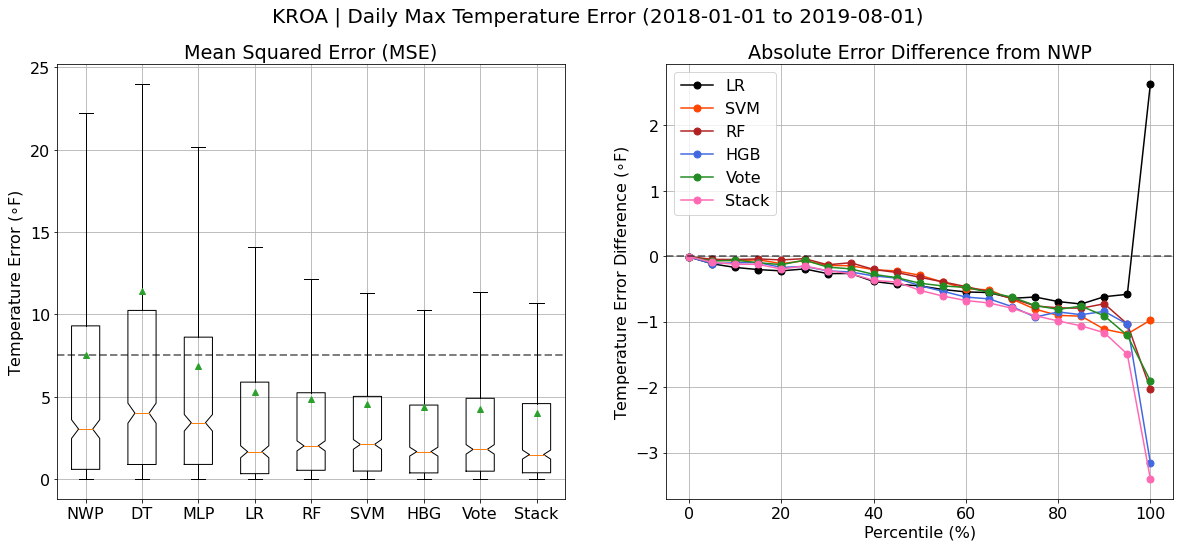

In [59]:
#Calculate difference between prediction and observation
def compute_err(ys_pred,ys_test):
  return (ys_pred-ys_test)

#Compute difference between cumulative distribution of ML error and NWP model average error 
def compute_pct_err(ys_pred,ys_test,ys_nwp):
  parr = []
  #Loop through each percentile and calculate the absolute error difference between the NWP model average error and ML model error
  for k in range(0,101,1):
    parr.append(np.percentile(abs(ys_pred-ys_test),k)-np.percentile(abs(ys_nwp-ys_test),k))

  parr = np.array(parr)
  return parr

#Get observed maximum temperature
y_test_tmp = y_test['OBS_tmpf_max'].values

#Compute prediction error for each ML model
yerr_lr = compute_err(y_lr_usel,y_test_tmp) #Linear Regression (LR) 
yerr_svm = compute_err(y_svm_usel,y_test_tmp) #Support Vector Machine (SVM)
yerr_tree = compute_err(y_tree,y_test_tmp) #Decision Tree (DT)
yerr_rf = compute_err(y_rf_tsel,y_test_tmp) #Random Forest (RF)
yerr_hgb = compute_err(y_hgb_tsel,y_test_tmp) #Histogram Gradient Boosting (HGB)
yerr_mlp = compute_err(y_mlp_usel,y_test_tmp) #Multi-Layer Perceptron (MLP)
yerr_vote = compute_err(y_vote_tsel,y_test_tmp) #Voting Regressor (Vote)
yerr_stack = compute_err(y_stack_tsel,y_test_tmp) #Stacking Regressor (Stack)

#Set minimum font size for plot
fs=16
matplotlib.rcParams.update({'font.size': fs})

#Get NWP model average max temperature
nwp_max_tmp = max_tmp[-y_test_tmp.shape[0]:].values #Limit to testing period
#Compute NWP model average error
nwp_err = nwp_max_tmp - y_test_tmp

#Compute percentile error difference between ML models and NWP model average
lr_err_diff = compute_pct_err(y_lr_usel,y_test_tmp,nwp_max_tmp)
dt_err_diff = compute_pct_err(y_tree,y_test_tmp,nwp_max_tmp)
svm_err_diff = compute_pct_err(y_svm_usel,y_test_tmp,nwp_max_tmp)
mlp_err_diff = compute_pct_err(y_mlp_usel,y_test_tmp,nwp_max_tmp)
rf_err_diff = compute_pct_err(y_rf_tsel,y_test_tmp,nwp_max_tmp)
hgb_err_diff = compute_pct_err(y_hgb_tsel,y_test_tmp,nwp_max_tmp)
vote_err_diff = compute_pct_err(y_vote_usel,y_test_tmp,nwp_max_tmp)
stack_err_diff = compute_pct_err(y_stack_tsel,y_test_tmp,nwp_max_tmp)

#Plot max temperature error comparison
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(121)
#Plot mean squared error of NWP model and ML models
plt.boxplot([nwp_err**2,yerr_tree**2,yerr_mlp**2,yerr_lr**2,yerr_rf**2,yerr_svm**2,yerr_hgb**2,yerr_vote**2,yerr_stack**2],notch=True,showmeans=True,showfliers=False)
plt.grid(True)
#Plot line depecting median NWP model average error
plt.axhline(y=np.mean(nwp_err**2),color='k',linestyle='--',lw=2,alpha=0.5) 
#Add axis labels and ticklabels
plt.ylabel('Temperature Error ($\circ$F)')
ax1.set_xticklabels(['NWP','DT','MLP','LR','RF','SVM','HBG','Vote','Stack'])
plt.title('Mean Squared Error (MSE)')
#Plot percentile error difference between ML models and NWP model average
ax2 = plt.subplot(122)
pct_ran = np.arange(0,101,1)
plt.plot(pct_ran[::5],lr_err_diff[::5],'-ok',ms=7,label='LR')
plt.plot(pct_ran[::5],svm_err_diff[::5],'-ok',color='orangered',ms=7,label='SVM')
plt.plot(pct_ran[::5],rf_err_diff[::5],'-ok',color='firebrick',label='RF',ms=7)
plt.plot(pct_ran[::5],hgb_err_diff[::5],'-ok',color='royalblue',label='HGB',ms=7)
plt.plot(pct_ran[::5],vote_err_diff[::5],'-ok',color='forestgreen',label='Vote',ms=7)
plt.plot(pct_ran[::5],stack_err_diff[::5],'-ok',color='hotpink',label='Stack',ms=7)
plt.legend(numpoints=1,loc='best')
plt.grid(True)
#Add dashed zero-line depecting at whether Ml models outperform or underperform NWP model
plt.axhline(y=0,color='k',linestyle='--',lw=2,alpha=0.5)
#Add axis labels and title 
plt.ylabel('Temperature Error Difference ($\circ$F)')
plt.title('Absolute Error Difference from NWP')
plt.xlabel('Percentile (%)')
plt.suptitle('KROA | Daily Max Temperature Error ('+dates[-y_test_tmp.shape[0]]+' to '+dates[-1]+')',fontsize=fs+4)
plt.show()

**Nearly all ML models outperform the NWP model average** with the exception of decion trees which are prone to overfitting and the multi-layer perceptron which would likely benefit considerably from tuning.

*Mean Squared Error*

- The best model is actually a combination of models (i.e. the stacking regressor). The model that reduces the most variance is the histogram gradient boosting regressor while the model that reduces the most bias (median squared error) is linear regression. 

*Absolute Error Difference*

- The absolute error difference from the NWP model average, plotted as a function of error magnitude (i.e. percentile) reveals **why machine learning is so powerful!**
- The efficacy of machine learning models in reducing error is felt most strongly at the tail of the absolute error distribution. On any given day, with persistant quiescent weather, ML models may offer only marginal benefit over the NWP model average (e.g. at 50th percentile). When NWP model errors are large, that is when machine learning really shines.





### Reliability  

Another type of verification/evaluation metric is the **reliability curve** 
- Shows model bias with respect to a conditional mean observation for each forecasted value
- What is the mean observed value for a given range of forecast values
- Data points above the 1-1 line are underforecasting, points under the line are overforecasting


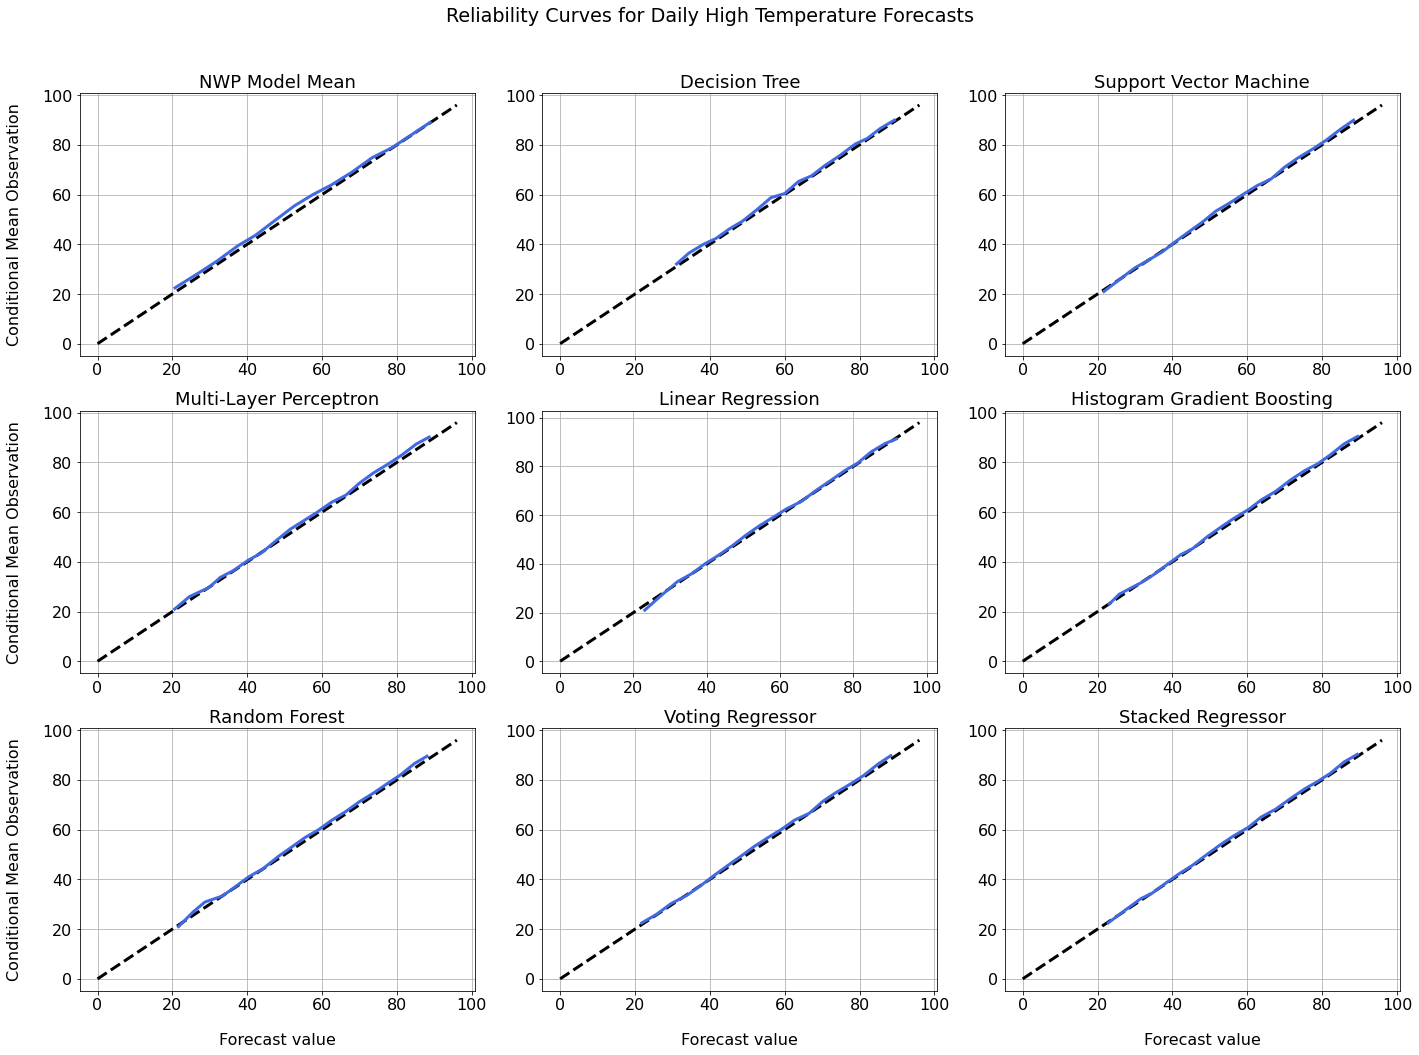

In [60]:
def regression_reliability_curve(forecasts,observations,mdl_typ,ax,nbins=20):
  step = (np.nanmax(forecasts)-np.nanmin(forecasts))/nbins
  bins = np.arange(np.nanmin(forecasts),np.nanmax(forecasts),step)

  mean_forecast = np.empty( (np.shape(bins)) )*np.nan
  mean_obs = np.empty( (np.shape(bins)) )*np.nan

  # For each bin, find the mean forecast value and observation
  for b,bin in enumerate(bins[:-1]):
    bin_indices = np.where((forecasts >= bin) & (forecasts < bins[b+1]))[0]
    mean_forecast[b] = np.nanmean(forecasts[bin_indices])
    mean_obs[b] = np.nanmean(observations[bin_indices])

  #Get maximum value of both datasets to plot
  max_value = np.nanmax( [np.nanmax(forecasts) , np.nanmax(observations)] )
  perfect_values = np.arange(0.,max_value)

  #Plotting 1-1 line
  ax.plot(perfect_values,perfect_values,linestyle='dashed',color='k',lw=3)
  #Plotting mean forecast values versus the mean observations
  ax.plot(mean_forecast,mean_obs,lw=3,color='royalblue') #mean_forecast,mean_obs,lw=3,color='royalblue')
  #ax.set_ylabel('Conditional Mean Observation',fontsize=16)
  #ax.set_xlabel('Forecast value',fontsize=16)
  ax.set_title(mdl_typ,fontsize=18)
  ax.grid(True)
  return

y_test_maxtmp = y_test['OBS_tmpf_max'].values

plt.figure(figsize=(20,15))
ax1 = plt.subplot(331)
regression_reliability_curve(nwp_max_tmp, y_test_maxtmp,'NWP Model Mean', ax1, nbins=15)
ax1.set_ylabel('Conditional Mean Observation',fontsize=16,labelpad=20)
ax2 = plt.subplot(332)
regression_reliability_curve(y_tree, y_test_maxtmp,'Decision Tree', ax2, nbins=20)
ax3 = plt.subplot(333)
regression_reliability_curve(y_svm_usel, y_test_maxtmp,'Support Vector Machine', ax3, nbins=20)
ax4 = plt.subplot(334)
regression_reliability_curve(y_mlp_usel, y_test_maxtmp,'Multi-Layer Perceptron', ax4, nbins=20)
ax4.set_ylabel('Conditional Mean Observation',fontsize=16,labelpad=20)
ax5 = plt.subplot(335)
regression_reliability_curve(y_lr_usel, y_test_maxtmp,'Linear Regression', ax5, nbins=20)
ax6 = plt.subplot(336)
regression_reliability_curve(y_hgb_tsel, y_test_maxtmp,'Histogram Gradient Boosting', ax6, nbins=20)
ax7 = plt.subplot(337)
regression_reliability_curve(y_rf_tsel, y_test_maxtmp,'Random Forest', ax7, nbins=20)
ax7.set_ylabel('Conditional Mean Observation',fontsize=16,labelpad=20)
ax7.set_xlabel('Forecast value',fontsize=16,labelpad=20)
ax8 = plt.subplot(338)
regression_reliability_curve(y_vote_usel, y_test_maxtmp,'Voting Regressor', ax8, nbins=20)
ax8.set_xlabel('Forecast value',fontsize=16,labelpad=20)
ax9 = plt.subplot(339)
regression_reliability_curve(y_stack_tsel, y_test_maxtmp,'Stacked Regressor', ax9, nbins=20)
ax9.set_xlabel('Forecast value',fontsize=16,labelpad=20)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Reliability Curves for Daily High Temperature Forecasts')
plt.show()

# **8. [Multi-output Regression](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html)**

## Training

The scikit-learn library offers a multi-output regressor/classifier to extend support for multi-output to models that do not natively support it.

Below we'll use a multi-output regressor to predict continuous variables:

**Daily**
- Minimum Temperature
- Maximum Temperature
- Maximum Wind Speed 

*Note*: the multi-output regressor simply allows you to predict multiple targets at once it *does not* attempt to predict multiple targets simultaneously! For example, when training an XGBoost algorithm with a multi-output regressor it'll initialize three XGBoost trees with each one assigned a different target. The multi-output regressor is simply an efficient way to train a model for multiple targets quickly.

In [61]:
def regression_stats_multi(ys_pred,ys_test):
  nn = ['Maximum Temperature','Minimum Temperature','Maximum Wind Speed']
  for i in range(ys_pred.shape[1]):
    print(f'Name: '+nn[i])
    print(f'MAE: {mean_absolute_error(ys_pred[:,i],ys_test[:,i])}')
    print(f'RMSE : {np.sqrt(mean_squared_error(ys_pred[:,i],ys_test[:,i]))}\n')

def run_multi(Xs_train,Xs_test,ys_train,ys_test,typ):
  #Initialize the XGB model
  #Set learning rate and max tree depth to match the results from the colab notebook and previous versions of XGBoost
  multi_xgb = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=250,objective='reg:squarederror',random_state=0,learning_rate=0.1,max_depth=3)) 
  #Train an XGBoost (XGB) model
  multi_xgb.fit(Xs_train,ys_train)
  #Generate predictions using the test dataset
  y_pred_multi = multi_xgb.predict(Xs_test)
  regression_stats_multi(y_pred_multi,ys_test)
  return y_pred_multi

#Perform multi-output regression using the full feature dataset
#Since we're training on all features we won't use a feature subset since the subsets would need to be updated for each target.
y_multi = run_multi(X_train,X_test,y_train.iloc[:,0:3].values,y_test.iloc[:,0:3].values,'All Features')

Name: Maximum Temperature
MAE: 1.547915216074958
RMSE : 2.033851012071244

Name: Minimum Temperature
MAE: 1.4805040582732365
RMSE : 1.9352481277133056

Name: Maximum Wind Speed
MAE: 2.2306959813720386
RMSE : 4.683387053755046



## Model Comparison

In the following cell we'll compare the performance of the XGBoost regressor to the NWP model average for the three continous target variables.

In this case, we present boxplots of prediction error to highlight  model bias.

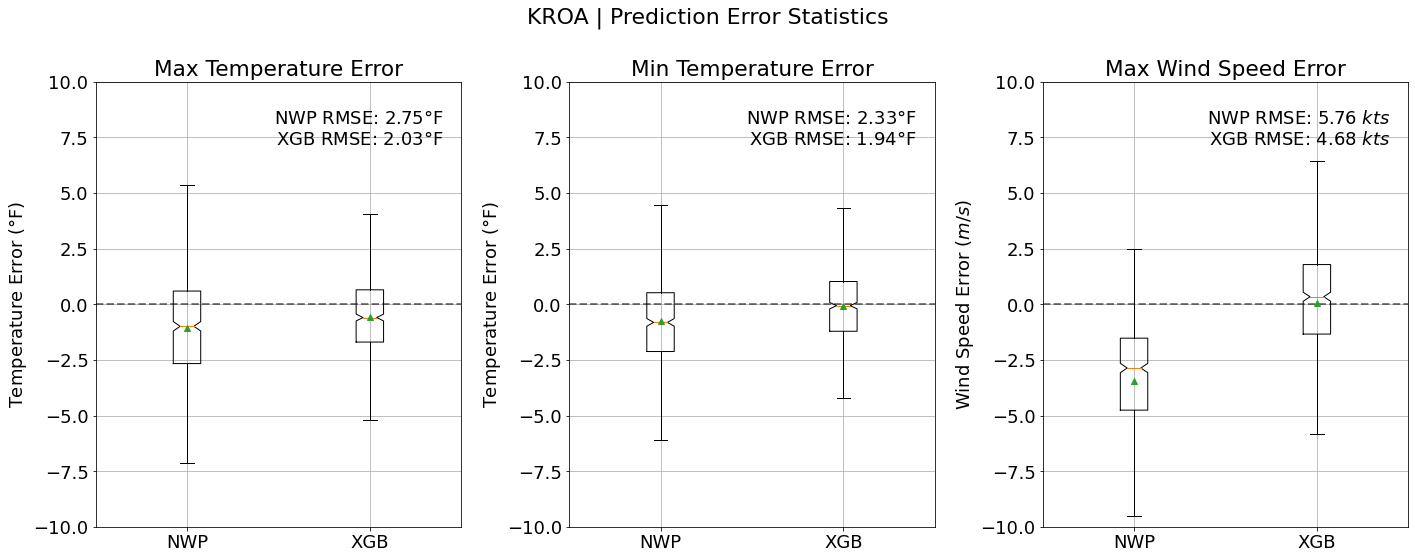

In [62]:
#Retrieve difference between predictions and observations during test period
yerr_tmax = compute_err(y_multi[:,0],y_test['OBS_tmpf_max'].values)
yerr_tmin = compute_err(y_multi[:,1],y_test['OBS_tmpf_min'].values)
yerr_wnd = compute_err(y_multi[:,2],y_test['OBS_sknt_max'].values)

#Set minimum font size for plot
fs=18
matplotlib.rcParams.update({'font.size': fs})

#Get NWP model average max temperature 
nwp_max_tmp = max_tmp[-y_test_tmp.shape[0]:].values #Limit to testing period
#Calculate model average max temperature error
nwp_max_tmp_err = nwp_max_tmp - y_test['OBS_tmpf_max'].values

#Get NWP model average min temperature 
nwp_min_tmp = min_tmp[-y_test_tmp.shape[0]:].values #Limit to testing period
#Calculate model average min temperature error
nwp_min_tmp_err = nwp_min_tmp - y_test['OBS_tmpf_min'].values

#Get NWP model average max wind speed 
nwp_max_wnd = max_wnd[-y_test_tmp.shape[0]:].values #Limit to testing period
#Calculate model average max wind speed error
nwp_max_wnd_err = nwp_max_wnd - y_test['OBS_sknt_max'].values

#RMSE calculation

#max temperature rmse
xgb_rms_tmax = round(np.mean(np.sqrt(mean_squared_error(y_multi[:,0],y_test['OBS_tmpf_max'].values))),2)
nwp_rms_tmax = round(np.mean(np.sqrt(mean_squared_error(nwp_max_tmp,y_test['OBS_tmpf_max'].values))),2)

#min temperature rmse
xgb_rms_tmin = round(np.mean(np.sqrt(mean_squared_error(y_multi[:,1],y_test['OBS_tmpf_min'].values))),2)
nwp_rms_tmin = round(np.mean(np.sqrt(mean_squared_error(nwp_min_tmp,y_test['OBS_tmpf_min'].values))),2)

#wind speed rmse
xgb_rms_wnd = round(np.mean(np.sqrt(mean_squared_error(y_multi[:,2],y_test['OBS_sknt_max'].values))),2)
nwp_rms_wnd = round(np.mean(np.sqrt(mean_squared_error(nwp_max_wnd,y_test['OBS_sknt_max'].values))),2)

#Plot comparison between NWP model average error and ML prediction error
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(131)
#Boxplots of max temp RMSE
plt.boxplot([nwp_max_tmp_err,yerr_tmax],notch=True,showmeans=True,showfliers=False)
plt.grid(True)
#Add line through zero (to denote sign of bias)
plt.axhline(y=0,color='k',linestyle='--',lw=2,alpha=0.5)
#Set title and axis labels
plt.ylabel('Temperature Error ($\degree$F)') 
ax1.set_xticklabels(['NWP','XGB']) 
ax1.set_ylim([-10,10])
#Add textual annotation
ax1.text(0.95, 0.85, 'NWP RMSE: '+str(nwp_rms_tmax)+'$\degree$F\nXGB RMSE: '+str(xgb_rms_tmax)+'$\degree$F',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='k', fontsize=fs)
plt.title('Max Temperature Error')
ax2 = plt.subplot(132)
plt.boxplot([nwp_min_tmp_err,yerr_tmin],notch=True,showmeans=True,showfliers=False)
plt.grid(True)
#Add line through zero (to denote sign of bias)
plt.axhline(y=0,color='k',linestyle='--',lw=2,alpha=0.5)
#Set title and axis labels
plt.ylabel('Temperature Error ($\degree$F)')
ax2.set_xticklabels(['NWP','XGB']) 
ax2.set_ylim([-10,10])
#Add textual annotation
ax2.text(0.95, 0.85, 'NWP RMSE: '+str(nwp_rms_tmin)+'$\degree$F\nXGB RMSE: '+str(xgb_rms_tmin)+'$\degree$F',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='k', fontsize=fs)

plt.title('Min Temperature Error')
ax3 = plt.subplot(133)
plt.boxplot([nwp_max_wnd_err,yerr_wnd],notch=True,showmeans=True,showfliers=False)
plt.grid(True)
#Add line through zero (to denote sign of bias)
plt.axhline(y=0,color='k',linestyle='--',lw=2,alpha=0.5)
#Set title and axis labels
plt.ylabel('Wind Speed Error ($m/s$)')
ax3.set_xticklabels(['NWP','XGB']) 
ax3.set_ylim([-10,10])
#Add textual annotation
ax3.text(0.95, 0.85, 'NWP RMSE: '+str(nwp_rms_wnd)+' $kts$\nXGB RMSE: '+str(xgb_rms_wnd)+' $kts$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='k', fontsize=fs)
plt.title('Max Wind Speed Error')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.suptitle('KROA | Prediction Error Statistics',fontsize=fs+4)
plt.show()

For all three continuous variables the XGBoost regressor outperforms the NWP model forecast average. Most notably, for each variable, the **bias is reduced to near zero**. Machine learning models like XGBoost are thus capable of constraing variance (see 7. Model Comparison) and bias.

# **9 . Binary Classification**

In the following section we'll aim to predict whether or not precipitation will occur at daily time-scales at KROA. This binary classification problem will be examined using a variety of scoring metrics outlined below.

### [Classification Scoring Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

Some common evaluation metrics used with classification problems are: 

Variables:
  - $Tp$: True positive
  - $Tn$: True negative
  - $Fp$: False positive
  - $Fn$: False Negative

Precision (true positive rate): $\frac{Tp}{Tp+Fp}$
  - Fraction of correctly identified positive cases from all positive cases. 

Fall-out (false positive rate): $\frac{Fp}{Fp+Tn}$
  - Fraction of incorrectly identified negative cases from all negative cases.

Recall (hit rate): $\frac{Tp}{Tp+Fn}$
  - Fraction of correctly identified positive cases from all positive cases. Useful when the cost of False Negatives is high.
  
False Positive Rate

Accuracy: $\frac{Tp+Tn}{Tp+Fn+Tn+Fp}$
  - The fraction of all correctly identified cases. Most useful when all outcomes can be considered equally important or when true positives and true negatives are more important.

F1 Score: $2*\frac{precision*recall}{precision+recall}$
  - The harmonic mean of precision and recall. Better measure of incorrectly classified cases than accuracy. Good for when distribution of classes is imbalanced. F1-score is used when False Negatives and False Positives are important.

Support: The number of actual occurrences of the class in the dataset.

weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

Brier Score Loss: $\frac{1}{N} \sum\limits_{i = 1}^{N} (\hat{y}_i - y_i)^2$
  - Classification equivalent of mean squared error for regression problems. Smaller score are better (Loss).

More classification evalution metrics can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). 


### Feature Selection

Below we perform tree-based feature selection to limit the features used in training classification algorithms

In [63]:
from sklearn.linear_model import LogisticRegression
X_train_usel_class,X_test_usel_class = get_usel(X_train_scaled,X_test_scaled,y_train['OBS_phour'].values,150)
#Initialize an XGBoost (XGB) classifier
xgb_class = xgb.XGBClassifier(n_estimators=250,objective='reg:squarederror',random_state=0,learning_rate=0.1,max_depth=3) #Set learning rate and max tree depth to match the results from the colab notebook and previous versions of XGBoost)
X_train_tsel_class,X_test_tsel_class = get_msel(xgb_class,X_train,X_test,y_train['OBS_phour'].values,'mean')


Training Data shape: (2555, 2061)
Selected Training Data shape: (2555, 150)

Training Data shape: (2555, 2061)
Selected Training Data shape: (2555, 370)


## Model Training

To examine the performance of classification algorithms we train a logistic regression classifier, linear SVM classifier, and an XGBoost classifier to predict whether precipitation will occur or not.

Precipitation Boolean (0 = None, 1 = Precipitation)

For each algorithm we print a classification report in addition to an accuracy score and brier score loss.

In [64]:
from sklearn.metrics import accuracy_score,brier_score_loss,classification_report,confusion_matrix
def class_stats(ys_test,ys_pred):
  print(f'Accuracy Score: {accuracy_score(ys_test,ys_pred)}')
  print(f'Brier Score: {brier_score_loss(ys_test,ys_pred)}')
  print(f'Classification Report\n {classification_report(ys_test,ys_pred)}')
  return confusion_matrix(ys_test, ys_pred)

nwp_model = class_stats(y_test['OBS_phour'].values,precip_mn[-y_test['OBS_phour'].values.shape[0]:])

#Initialize the logestic model
lr_class = LogisticRegression()
#Train an linear classifier (LG) model
lr_class.fit(X_train_usel_class,y_train['OBS_phour'].values)
#Generate predictions using the test dataset
lr_class_pred = lr_class.predict(X_test_usel_class)
print('Logistic Regression\n')
lr_matrix = class_stats(y_test['OBS_phour'].values,lr_class_pred)

#Initialize the SVM model
svm_class = svm.LinearSVC(random_state=0)
#Train the SVM classifier
svm_class.fit(X_train_usel_class,y_train['OBS_phour'].values)
#Generate predictions using the test dataset
svm_class_pred = svm_class.predict(X_test_usel_class)
print('\n------------------------------------------------------\n')
print('SVM Classifier\n')
svm_matrix = class_stats(y_test['OBS_phour'].values,svm_class_pred)

from sklearn.ensemble import HistGradientBoostingClassifier
#Initialize the XGBoost (XGB) model or uncomment the line below and use the HistGradientBoosting Classifier (takes a little longer to run)
#xgb_class = HistGradientBoostingClassifier(max_iter=250,random_state=0)
xgb_class = xgb.XGBClassifier(n_estimators=250,objective='reg:squarederror',random_state=0,learning_rate=0.1,max_depth=3) #Set learning rate and max tree depth to match the results from the colab notebook and previous versions of XGBoost)
#Train an XGB classifier 
xgb_class.fit(X_train_tsel_class,y_train['OBS_phour'].values)
#Generate predictions using the test dataset
xgb_class_pred = xgb_class.predict(X_test_tsel_class)
print('\n------------------------------------------------------\n')
print('XGB Classifier\n')
xgb_matrix = class_stats(y_test['OBS_phour'].values,xgb_class_pred)

Accuracy Score: 0.8227194492254734
Brier Score: 0.17728055077452667
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       269
         1.0       0.87      0.79      0.83       312

    accuracy                           0.82       581
   macro avg       0.82      0.83      0.82       581
weighted avg       0.83      0.82      0.82       581

Logistic Regression

Accuracy Score: 0.8244406196213425
Brier Score: 0.17555938037865748
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       269
         1.0       0.85      0.81      0.83       312

    accuracy                           0.82       581
   macro avg       0.82      0.83      0.82       581
weighted avg       0.83      0.82      0.82       581


------------------------------------------------------

SVM Classifier

Accuracy Score: 0.8158347676419966
Brier Score: 0.18416523235800344
Cl

The classification statistics above indicate that the XGB classifier provides the best performance with the highest f1 score and lowest brier score loss of any algorithm.

## Performance

### [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Below we plot statistics from a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Confusion matrices contain the number of true positives (Tp), false positives (Fp), true negatives (Tn), and false negatives (Fn). 

A comparision between confusion matrices produced by different classification models is visualized in a bar chart.

Text(0.5, 1.0, 'Precipitation Testing Error (Categorical)')

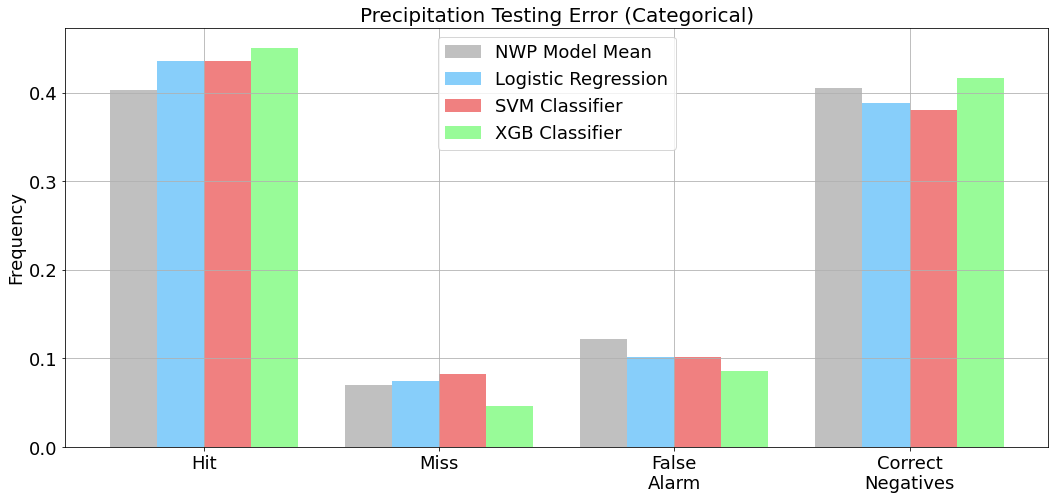

In [65]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve
#Define bar labels
xl = ['Hit', 'Miss','False\nAlarm','Correct\nNegatives']
#Normalize confusion matrices and convert matrices to array to match NWP classification stats
nwp_cnt = pd.Series(cnts/cnts.sum(),name='NWP')
lr_cnt = pd.Series([lr_matrix[1,1],lr_matrix[0,1],lr_matrix[1,0],lr_matrix[0,0]]/lr_matrix.sum(),name='Logistic Regression')
svm_cnt = pd.Series([svm_matrix[1,1],svm_matrix[0,1],svm_matrix[1,0],svm_matrix[0,0]]/svm_matrix.sum(),name='Linear SVC')
xgb_cnt = pd.Series([xgb_matrix[1,1],xgb_matrix[0,1],xgb_matrix[1,0],xgb_matrix[0,0]]/xgb_matrix.sum(),name='XGBoost')

#Combine series in pandas DataFrame
df = pd.concat([nwp_cnt,lr_cnt,svm_cnt,xgb_cnt],axis=1)

fig = plt.figure(figsize=(15,7))
#Plot categorical precipitation error
ax1 = plt.subplot(111)

# create data
x = np.arange(4)
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.3, nwp_cnt.values, width, color='silver')
plt.bar(x-0.1, lr_cnt.values, width, color='lightskyblue')
plt.bar(x+0.1, svm_cnt.values, width, color='lightcoral')
plt.bar(x+0.3, xgb_cnt.values, width, color='palegreen')
plt.xticks(x, xl)
plt.xlabel("")
plt.grid(True)
plt.ylabel("Frequency")
plt.legend(["NWP Model Mean", "Logistic Regression","SVM Classifier","XGB Classifier"])
plt.tight_layout()
#Plot bars
#ax3.bar(xl,cnts/cnts.sum())
plt.ylabel('Frequency')
plt.title('Precipitation Testing Error (Categorical)',fontsize=fs+2)


### ROC and DOC Curves

A [Receiver Operator Characteristic (ROC) curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a graphical tool to examine the diagnostic ability of binary classifiers.

The ROC curve shows the trade-off between the true positive rate (TPR) and the specificity (1 – FPR) wherein FPR is the false positive rate. 

Classifiers producing curves closer to the upper-left corner exhibit better performance. A random classifier is expected to produce points lying along the diagonal (i.e. where the FPR = TPR). 

Notably, the ROC curve is independent of class distribution making it useful for evaluating classifiers for rare events.

------------------------------------------------------------------------

[Detection Error Tradeoff (DET) curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_det.html) show the 
miss rate (1 - TPR) versus false alarms (FPR), using the normal deviate scale. This difference in scaling can allow for the easier assemenet of classification performance than ROC curves which utilize a linear scale.

DET curves highlight the trade-off between false-negative error rate (miss rate) and the false positive rate (false alarm rate). One can deduce from the curve the rate at which the miss rate will improve when willing to accept an increase in the false alarm rate (or vice-versa).

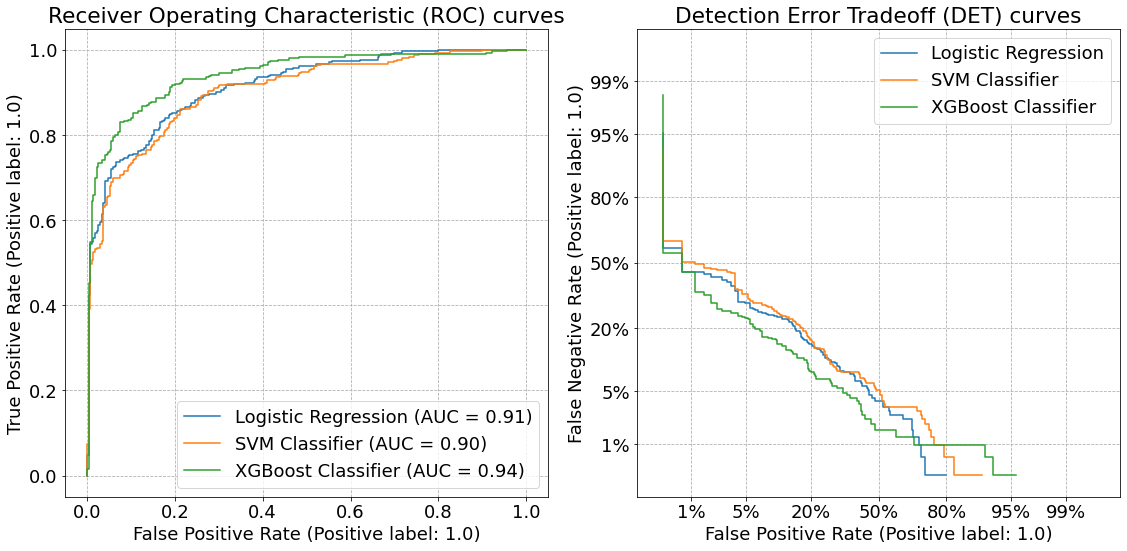

In [66]:
from sklearn.metrics import plot_det_curve
# prepare plots
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
r1=plot_roc_curve(lr_class, X_test_usel_class, y_test['OBS_phour'].values, ax=ax1, name='Logistic Regression')
r2=plot_roc_curve(svm_class, X_test_usel_class, y_test['OBS_phour'].values, ax=ax1, name='SVM Classifier')
r3=plot_roc_curve(xgb_class, X_test_tsel_class, y_test['OBS_phour'].values, ax=ax1, name='XGBoost Classifier')
ax2 = plt.subplot(122)
d1=plot_det_curve(lr_class, X_test_usel_class, y_test['OBS_phour'].values, ax=ax2, name='Logistic Regression')
d2=plot_det_curve(svm_class, X_test_usel_class, y_test['OBS_phour'].values, ax=ax2, name='SVM Classifier')
d3=plot_det_curve(xgb_class, X_test_tsel_class, y_test['OBS_phour'].values, ax=ax2, name='XGBoost Classifier',)

ax1.set_title('Receiver Operating Characteristic (ROC) curves')
#ax1.legend([r1, r2, r3], ['Logistic Regression', 'SVM', 'XGBoost'],loc='lower right')
ax2.set_title('Detection Error Tradeoff (DET) curves')
#ax2.legend([d1, d2, d3], ['Logistic Regression', 'SVM', 'XGBoost'],loc='upper right')
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc='upper right')
plt.tight_layout()

The figures above illustrate the superiority of the XGB Classifier over the Logistic Regression and SVM models.

The ROC curve for the XGBoost classifier is closer to the upper left corner of the plot indicative of a higher true positive rate and lower false positive rate.

On the right, the DET curve shows the trade-off between misses (false negative rate) and false alarms (false positive rate). From this graph one can deduce that accepting a false positive rate of 20% would result in a false negative rate of ~7% for the XGBoost classifier and 15% for the SVM and logistic regression classifiers.

# **10. Exercise**

In this exercise you'll dive a little deeper and experiment with adding features and modifying predictors to enhance the performance of the machine learning models examined previously.

In [67]:
#Examine feature importance for the XGBoost regressor 
from sklearn.inspection import permutation_importance

#Define a function to retrieve feature importance from tree-based model
def run_gb_mdl(mdl,Xs_train,Xs_test,ys_train,ys_test,typ):
  mdl.fit(Xs_train,ys_train)
  feats = mdl.feature_importances_
  fidx = np.argsort(feats)[::-1]
  #Make predictions using test features
  y_pred = mdl.predict(Xs_test)
  #Calculate and display model error
  regression_stats(mdl,typ,Xs_test,y_pred,ys_test)
  #Return predictions, feature importance, and index of features sorted by importance
  return y_pred,feats[fidx],fidx

xgb_reg = xgb.XGBRegressor(n_estimators=250,objective='reg:squarederror',random_state=0,learning_rate=0.1,max_depth=3) #Set learning rate and max tree depth to match the results from the colab notebook and previous versions of XGBoost)
y_xgb_tmax,y_xgb_feat,y_xgb_fidx = run_gb_mdl(xgb_reg,X_train_tsel,X_test_tsel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'XGboost (Tree-based Select)')
y_lr_tmax = run_lr(X_train_tsel,X_test_tsel,y_train['OBS_tmpf_max'].values,y_test['OBS_tmpf_max'].values,'Tree-based Select')

print('\nNWP (Model Averge)')
print(f'MAE: {mean_absolute_error(nwp_max_tmp,y_test["OBS_tmpf_max"].values)}')
print(f'RMSE: {np.sqrt(mean_squared_error(nwp_max_tmp,y_test["OBS_tmpf_max"].values))}')


XGboost (Tree-based Select)
Score : 0.9848187290088
MAE: 1.7311762666948483
RMSE : 2.2463254188504926

Linear Regression (Tree-based Select)
Score : 0.9859567623582097
MAE: 1.6805806240246095
RMSE : 2.1604898370621646

NWP (Model Averge)
MAE: 2.131089031450477
RMSE: 2.746506344073141


In the case of minimum temperature linear regression beats an out-of-the-box gradient boosting method (XGBoost). Why do you think this is the case? Examine the feature importance below for the XGBoost model and consider the effects of colinearity (recall 7. Feature Analysis)

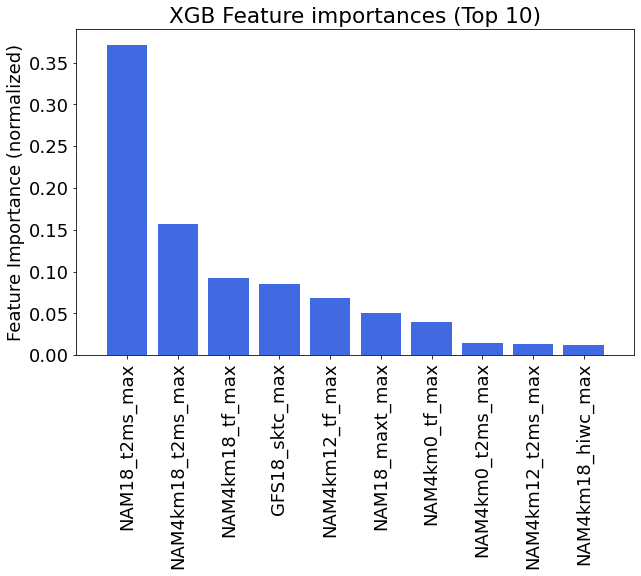

In [68]:
# Plot the impurity-based feature importances of the forest 

#Display top 10 features
no_of_feats = 10

#Initialize figure
plt.figure(figsize=(10,6))
#Add title and axis labels
plt.title("XGB Feature importances (Top 10)")
plt.ylabel('Feature Importance (normalized)')
#Plot feature importance as bar chart
plt.bar(range(0,no_of_feats), y_xgb_feat[0:no_of_feats],
        color="royalblue", align="center")
#Add feature names below tick labels 
plt.xticks(range(0,no_of_feats), X_train_tsel.columns[y_xgb_fidx][0:no_of_feats],rotation=90)
plt.xlim([-1, no_of_feats]) #Set axis limits
plt.show()

**Can we do better?**

Machine learning performance is often examined in terms of bias and variance. Balancing the trade-off betweent the two is a key challenge for any ML model.

Learning curves provide a way to visualize this trade-off. Learning curves display training and testing (or cross-validation) error as a function of training sample size. 

Run the cell below to produce learning curves for the Min Temperature XGBRegressor. 

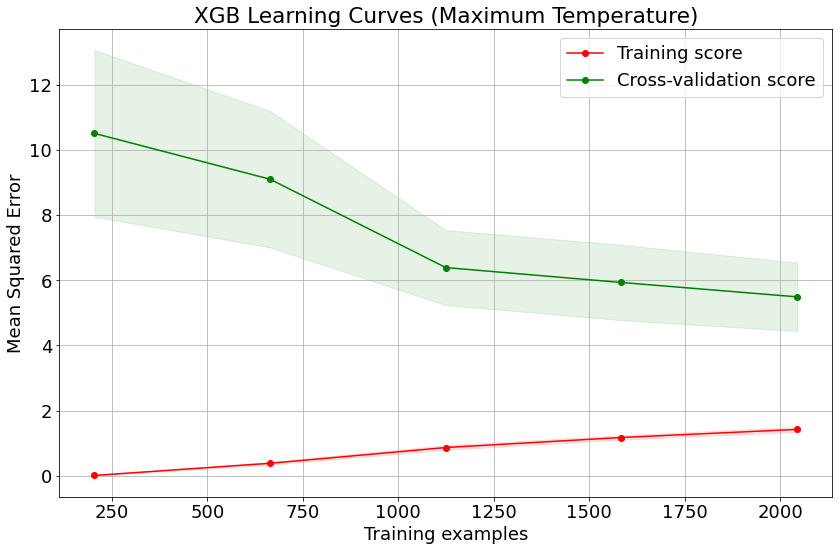

In [69]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Mean Squared Error")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,scoring='neg_mean_squared_error',
                       return_times=True)
    train_scores_mean = np.mean(abs(train_scores), axis=1)
    train_scores_std = np.std(abs(train_scores), axis=1)
    test_scores_mean = np.mean(abs(test_scores), axis=1)
    test_scores_std = np.std(abs(test_scores), axis=1)

    # Plot learning curve
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
plot_learning_curve(xgb_reg,'XGB Learning Curves (Maximum Temperature)', X_train_tsel,y_train['OBS_tmpf_max'].values,ax1,n_jobs=-1)
ax1.grid(True)
plt.tight_layout()

The learning curves show low training error which indicates low bias.
The large gap between the testing error (green) and training error (red) indicates large variance. 

In this case the model is over-fitting the training data. The model would likely benefit from either:
   - Reduced complexity (i.e. a smaller or better set of features)
   - More training data 

For further explanation of learning curves and the bias-variance trade-off see this [link](https://www.dataquest.io/blog/learning-curves-machine-learning/)

------------------------------------------------------------------------

Since we cannot increase the training size of our dataset. Lets consider modifying features and predictors to reduce over-fitting and variance. We'll accomplish this in two ways: 

  - Predicting temperature error instead of absolute temperature.
  - Adding features to directly account for seasonality.
  
Lets begin by adding the day of the year and month as features (reasonable to assume that forecast error may vary seasonally)


In [70]:
#Make a copy of the feature dataset
X_all = total_feature_data.copy()
#Get a list of dates from the dataset
date_list = X_all['date'].values
#Convert the dates to datetime format (exception handles certain cities with different date formats)
try:
  dts = [datetime.strptime(d,'%Y-%m-%d') for d in date_list]
except:
  dts = [datetime.strptime(d,'%m/%d/%Y') for d in date_list]

#Retrieve the day and month and add them to the dataset.
dt_day = np.int32([datetime.strftime(d,'%-j') for d in dts])
dt_mth = np.int32([datetime.strftime(d,'%-m') for d in dts])

X_all = X_all.join(pd.Series(dt_day,name='Day'))
X_all = X_all.join(pd.Series(dt_mth,name='Month'))

Next lets calculate the average NWP model error for daily minimum temperature. We'll add the most recent model error (i.e. persistance error) to the feature dataset to use as a predictor. 

In [71]:
#Function to calculate NWP model error for a given variable
def calc_err_df(dfs,ydf,obvar):
  
  #dfs - pandas dataframe containing NWP variables to be averaged
  #ydf - pandas dataframe containing observed variable
  #obvar - name of observed variable

  #Initialize arrays
  err_vals = []
  err_cols = []
  #Loop through each NWP model variable
  for cc in dfs.columns:    
    #Ignore standard deviation variables
    if ('std' in cc):
      continue
    #Add column name and model error to list
    err_cols.append(cc+'_err')
    err_vals.append(dfs[cc].values-ydf[obvar].values)

  #Save NWP model error as pandas dataframe
  err_vals = np.array(err_vals)
  df_err = pd.DataFrame(data=err_vals.T,index=np.arange(0,err_vals.shape[1]),columns=err_cols)
  return df_err

#Retrieve all surface temperature variables (in deg F) 
df_tmp = X_all.filter(like='tf')
#Filter out all temeprature variables except those for minimum temperature
df_tmp_max = df_tmp.filter(like='max')
#Calculate NWP min temperature error for all relevant variables
df_tmax_err = calc_err_df(df_tmp_max,total_label_data,'OBS_tmpf_max')

#Compute the mean error of NWP variables
tmax_mean = pd.Series(df_tmp_max.mean(axis=1).values,name='mean_max_temperature')
tmax_err = pd.Series(df_tmax_err.mean(axis=1).values,name='mean_error')
#Add the mean minimum temperature to the feature dataset
X_all = X_all.join(tmax_mean)
#Add the mean error to the feature dataset
X_all = X_all.join(tmax_err) 
#Shift the index of NWP error variables to the left one step and add to a pandas series
df_tmax_err = df_tmax_err.shift(periods=1)
#These series represent persistance (i.e. the forecast error from the prior day - which would typically be available)
persist_err = pd.Series(df_tmax_err.mean(axis=1).values,name='persist_err')
persist_err_std = pd.Series(df_tmax_err.std(axis=1).values,name='persist_err_std')
#Add the most recent model mean forecast error and standard deviation of forecast error to the feature dataset
X_all = X_all.join(persist_err) 
X_all = X_all.join(persist_err_std) 

Lets resplit the dataset containing new features. We'll remove the target (i.e. mean error variable) from the feature dataset to ensure independence between the target and feature datasets. 

Finally, you'll conclude the exercise by examining how the performance of machine learning models is changed when their trained to predict errors instead of absolute values. *Hint: In this case they should do better!*

In [ ]:
#Split testing and traing dataset with new features

#Training data between 2011 and 2017 (move starting date forward one since we're using persistance error)
X_train_new, y_train_new = split_data_year(X_all,
    total_label_data,'2011-01-02','2017-12-31')

#Testing data between 2018 and 2019
X_test_new, y_test_new = split_data_year(X_all,
    total_label_data,'2018-01-01','2019-12-31')

vvar = 'tmpf_max'

#Set target to mean model error
y_train_new = X_train_new['mean_error'].values 
y_test_new = X_test_new['mean_error'].values 

#Drop target from feature list (very important!!!)
X_train_new = X_train_new.drop(columns=['mean_error'])
X_test_new = X_test_new.drop(columns=['mean_error'])
  
'''

Below add code to perform machine learning regression 
Use the new training and testing dataset defined above.

1. Use feature selection to extract relevant features 
  - Try univariate selection and tree-based selection
  - Experiment with no feature selection (model will take longer to run!)

2. Train machine learning models to predict the minimum temperature error.
  - Compare the performance of ML models (e.g. XGB, linear SVM, etc.) to linear regression (LR). Is LR still better than XGB?
  - Plot feature importances for an XGBRegressor (see beginning of exercise for code example)
    - In what way is the distribution of feature importance different when XGB-trees are trained to predict 
      temperature errors as a opposted to absolute temperature?

  With tree-based selection this is the score I achieved for KROA max temperature using:
  
  LR (Tree-based Select)
  Score : 0.09559662949394676
  MAE: 1.7491486850589242
  RMSE : 2.4122539785782373

  XGBoost (Tree-based Select)
  Score : 0.4216862783348364
  MAE: 1.4720662226812111
  RMSE : 1.9289620954457714

  Stacked Regressor (Tree-based Select)
  Score : 0.4299206116635421
  MAE: 1.4559125247722182
  RMSE : 1.9151800749045957

  NWP (Model Averge)
  MAE: 2.131089031450477
  RMSE: 2.746506344073141

'''

### See other notebook for exercise solution ###

Copy and paste code from three previous cells above into the cell below. Define a function to automate machine learning predictions of different target variables (e.g. max temperature, min temperature, max wind speed). 
Try swapping the dataset with a different citiy from the list below. Explore how machine learning model performance and feature importance changes when producing predictions in different climates. Keep an eye out for bad observations or feature data.

  - kbro: Brownsville, TX
  - kcys: Cheyenne, WY
  - koma: Omaha, NE
  - kdbq: Dubuque, IA
  - kcmh: Columbus, OH
  - kchs: Charleston, SC
  - klit: Little Rock, AK
  - kboi: Boise, ID
  - klch: Lake Charles, LA
  - kgeg: Spokane, WA
  - kdfw: Dallas-Ft Worth, TX
  - kroa: Roanoke-Blacksburg, VA
  - keug: Eugene, OR
  - kast: Astoria, OR
  - kdlh: Duluth, MN
  - kjax: Jacksonville, FL

In [73]:
#Insert code below.

### See other notebook for exercise solution ###

Questions? Contact: cmcnich@uw.edu

**Acknowledgements**

*Burke, A., 2020: "Traditional Machine Learning Pipeline Applied to NWP Model Data"*

The first half of this notebook was largely insipired by the lecture material cited above. 